# Amazon Sales Data EDA and Modeling

The following portfolio project uses a [dataset downloaded from Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset?resource=download) that contains 1,000+ Amazon product ratings and reviews. The dataset is a collection of products sold on Amazon, specifically from the country of India.

## Phase 1: Importing Packages

The packages I will be using for this project are as follows:

- `pandas`
    - Data manipulation and analysis
    - The DataFrame data structure allows for ease in processing and cleaning the data
- `numpy`
    - Provides efficient array operations and mathematical functions
    - Key usage includes calculating statistics (e.g., mean, median) and handling numerical data transformations 
- `matplotlib`
    - Used for creating visualizations
    - Key usage includes basic plots like line charts, bar charts, and scatter plots to explore relationships in the data
- `seaborn`
    - Built on top of `matplotlib` for advanced statistical visualizations
    - Key usage includes creating heatmaps, pair plots, and box plots to explore patterns, distributions, and correlations
- `sqlite3`
    - Querying the data easily

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# set the grid style that I prefer
sns.set_style('darkgrid')

## Phase 2: Exploring the Dataset

A necessary part of the data analysis process is getting to know the shape of the dataset. I'll be exploring the columns, checking for null values, and just getting an overall feel for how the data is organized.

In [2]:
# read in the csv for amazon sales data
sales = pd.read_csv('/Users/ajgafford/Documents/Projects/Python/Kaggle/Amazon/CSVs/amazon.csv')
sales.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

First, I can see that the data is organized into 1,465 rows and 16 columns.

Second, a quick explanation of the relevant columns I'll be using for this project.

- `category`: The department and sub-departments that a product belongs to.
- `discounted_price`: The discounted price of the product. While not explicitly mentioned in the metadata, I'll be interpretting this as the price the item was sold for.
- `actual_price`: The actual price of the product. Again, while not explicitly mentioned, my interpretation is that this is the suggested retail price set by the manufacturer/seller of the product.
- `discount_percentage`: The proportion of the actual price that was taken off the item, represented as a percentage.
- `rating`: The average customer rating of the item, represented on a 1 to 5 star scale system.
- `rating_count`: The number of ratings that product was given.

Immediately, I can see that the dataset is mostly filled with non-null values. The only column that will need addressing in terms of null values is `rating_count`. The big issue that needs addressing is the data types. They are all objects. The following columns need to be addressed:

- `discounted_price` and `actual_price`:  The special symbol at the front of those strings (the symbol for the Indian Rupee) and any commas can be removed and then converted to `float64`.
- `discount_percentage`: The percent sign can be removed and then converted to `float64`.
- `rating`: From my initial look at the data, this should be `float64` but there might be some values that were misentered and are causing the issues.
- `rating_count`: Remove any commas, fill in the null values, and convert to `float64`.

In [4]:
# remove the special symbol and commas from the price columns
sales['discounted_price'] = sales['discounted_price'].str.replace('₹', '')
sales['discounted_price'] = sales['discounted_price'].str.replace(',', '')
sales['discounted_price'] = sales['discounted_price'].astype('float64')

sales['actual_price'] = sales['actual_price'].str.replace('₹', '')
sales['actual_price'] = sales['actual_price'].str.replace(',', '')
sales['actual_price'] = sales['actual_price'].astype('float64')

# remove the percent sign from discount_percentage
sales['discount_percentage'] = sales['discount_percentage'].str.replace('%', '')
sales['discount_percentage'] = sales['discount_percentage'].astype('float64')

# remove commas from rating_count
sales['rating_count'] = sales['rating_count'].str.replace(',', '')

# check the work
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [5]:
# find the unique values of rating and count them
sales['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

The culprit is a strange '|' in the rating column. From the value counts, my assumption is that `rating` is slightly skewed to the left, as it appears that many ratings are in the low 4's and upper 3's, with a few ratings in the low 3's to 2's. My guess would be that $ \text{mean} < \text{median} $. I'll be back filling that rating with the median.

In [6]:
sales[sales['rating'] == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


It would be best to fill the strange value with the median. Will first need to make that a null value, then back fill with the median.

In [7]:
# force rating to be numeric, filling in the | with null
sales['rating'] = pd.to_numeric(sales['rating'], errors='coerce')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [8]:
# find the median and mean rating
median_rating = sales['rating'].median()
print(f'Median Rating: {median_rating}')

mean_rating = sales['rating'].mean()
print(f'Mean Rating: {mean_rating}')

Median Rating: 4.1
Mean Rating: 4.096584699453552


My assumption was correct, though not as much as I anticipated. `rating` appears to be slightly skewed left, if not roughly symmetric around the median, as evidenced by $ \text{mean} < \text{median} $ and the mean and median being so close together.

In [9]:
# replace the null rating with the median
sales['rating'] = sales['rating'].fillna(median_rating)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

`rating_count` can be handled in a similar way.

In [10]:
# force rating_count to be numeric
sales['rating_count'] = pd.to_numeric(sales['rating_count'], errors='coerce')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [11]:
# find the median and mean rating_count
median_rating_count = sales['rating_count'].median()
print(f'Median Rating: {median_rating_count}')

mean_rating_count = sales['rating_count'].mean()
print(f'Mean Rating: {mean_rating_count}')

Median Rating: 5179.0
Mean Rating: 18295.541353383458


`rating_count` appears to be significantly skewed right, as $ \text{mean} > \text{median} $. Back filling with the median is appropriate.

In [12]:
# replace the null rating_count with the median
sales['rating_count'] = sales['rating_count'].fillna(median_rating_count)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

With the numeric values addressed, I think the only other preprocessing needed is looking at `category`. From the first glance, it looks like categories and sub categories are seperated by the '|' symbol.

In [13]:
sales['category'].unique()

array(['Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
       'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
       'Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
       'Electronics|HomeTheater,TV&Video|Televisions|StandardTelevisions',
       'Electronics|HomeTheater,TV&Video|Accessories|TVMounts,Stands&Turntables|TVWall&CeilingMounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables',
       'Electronics|HomeAudio|Accessories|SpeakerAccessories|Mounts',
       'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
       'Electronics|HomeTheater,TV&Video|Projectors',
       'Electronics|HomeAudio|Accessories|Adapters',
       'Electronics|HomeTheater,TV&Video|SatelliteEquipment|SatelliteReceivers',
       'Computers&Acces

From looking directly at Amazon's site, I would consider the first part of `category` (before the first '|') to be the department, and the part after the first '|' and before the second '|' to be the sub-department. The last part of the string would represent the type of product purchased. From there, I am not sure it's really necessary to go any deeper than that. Getting too specific will limit the scope of analysis and inference.

In [14]:
# split the category column into a list of strings, but only take the first two strings and the last string
sales[['department', 'sub_department']] = sales['category'].str.split('|', n=2, expand=True).iloc[:, :2]
sales['product_type'] = sales['category'].str.split('|').str[-1]

In [15]:
sales[['department', 'sub_department', 'product_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   department      1465 non-null   object
 1   sub_department  1465 non-null   object
 2   product_type    1465 non-null   object
dtypes: object(3)
memory usage: 34.5+ KB


In [16]:
sales['department'].unique()

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

In [17]:
print(f'There are {len(sales.department.unique())} unique departments represented in this dataset.')

There are 9 unique departments represented in this dataset.


In [18]:
sales['sub_department'].unique()

array(['Accessories&Peripherals', 'NetworkingDevices',
       'HomeTheater,TV&Video', 'HomeAudio', 'WearableTechnology',
       'Mobiles&Accessories', 'Accessories',
       'Headphones,Earbuds&Accessories', 'ExternalDevices&DataStorage',
       'Microphones', 'GeneralPurposeBatteries&BatteryChargers',
       'OfficePaperProducts', 'CraftMaterials', 'Cameras&Photography',
       'OfficeElectronics', 'Printers,Inks&Accessories', 'Monitors',
       'Components', 'Electrical', 'Arts&Crafts', 'PowerAccessories',
       'Tablets', 'Laptops', 'Kitchen&HomeAppliances',
       'Heating,Cooling&AirQuality', 'Kitchen&Dining',
       'HomeStorage&Organization', 'CarAccessories',
       'HomeMedicalSupplies&Equipment'], dtype=object)

In [19]:
print(f'There are {len(sales.sub_department.unique())} unique sub-departments represented in this dataset.')

There are 29 unique sub-departments represented in this dataset.


In [20]:
sales['product_type'].unique()

array(['USBCables', 'WirelessUSBAdapters', 'HDMICables',
       'SmartTelevisions', 'RemoteControls', 'StandardTelevisions',
       'TVWall&CeilingMounts', 'RCACables', 'Mounts', 'OpticalCables',
       'Projectors', 'Adapters', 'SatelliteReceivers', 'DVICables',
       'SpeakerCables', 'StreamingClients', 'AVReceivers&Amplifiers',
       'TowerSpeakers', '3DGlasses', 'SmartWatches', 'PowerBanks',
       'Smartphones', 'MicroSD', 'BasicMobiles', 'In-Ear',
       'AutomobileChargers', 'Cradles', 'WallChargers', 'OTGAdapters',
       'Tripods', 'SelfieSticks', 'Stands', 'CableConnectionProtectors',
       'Décor', 'ScreenProtectors', 'StylusPens', 'Bedstand&DeskMounts',
       'BasicCases', 'HandlebarMounts', 'On-Ear', 'CameraPrivacyCovers',
       'PhoneCharms', 'Shower&WallMounts', 'PenDrives', 'Mice',
       'GraphicTablets', 'Lapdesks', 'NotebookComputerStands',
       'Keyboards', 'Condenser', 'DisposableBatteries',
       'GelInkRollerballPens', 'Tape', 'Keyboard&MouseSets',
      

In [21]:
print(f'There are {len(sales.product_type.unique())} unique product types represented in this dataset.')

There are 207 unique product types represented in this dataset.


With the columns preprocessed and cleaned, I can remove any unneeded columns that won't really contribute to my research.

In [22]:
# which columns can be dropped
dropped_cols = ['product_link',
               'img_link',
               'review_id',
               'user_id',
               'about_product',
               'category',
               'product_id',
               'product_name',
               'user_name']

# drop those columns
sales = sales.drop(columns=dropped_cols)

# check the work
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1465 non-null   float64
 1   actual_price         1465 non-null   float64
 2   discount_percentage  1465 non-null   float64
 3   rating               1465 non-null   float64
 4   rating_count         1465 non-null   float64
 5   review_title         1465 non-null   object 
 6   review_content       1465 non-null   object 
 7   department           1465 non-null   object 
 8   sub_department       1465 non-null   object 
 9   product_type         1465 non-null   object 
dtypes: float64(5), object(5)
memory usage: 114.6+ KB


Now, the only other processing I think is still needed is the addition of some extra columns that I think could be interesting.

`rating_cat`: `rating` is quantitative, but can easily be classified into a categorical variable. I'll use the following scheme:

| Rating Scale | Categorical Rating |
| :-: | :-: |
| 1.0 - 1.9 | Poor |
| 2.0 - 2.9 | Fair |
| 3.0 - 3.9 | Good |
| 4.0 - 5.0 | Great |

In [23]:
# define the bins and labels
bins = [1.0, 1.9, 2.9, 3.9, 5.0]
labels = ['Poor', 'Fair', 'Good', 'Great']

# create the column
sales['rating_cat'] = pd.cut(sales['rating'], bins=bins, labels=labels, right=True, include_lowest=True)

# check the work
sales['rating_cat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1465 entries, 0 to 1464
Series name: rating_cat
Non-Null Count  Dtype   
--------------  -----   
1465 non-null   category
dtypes: category(1)
memory usage: 1.8 KB


While not every product sold gets rated or reviewed, I can estimate the total sales by multiplying `rating_count` and `discounted_price`.

In [24]:
sales['est_total_sales'] = sales['rating_count'] * sales['discounted_price']
sales['est_total_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1465 entries, 0 to 1464
Series name: est_total_sales
Non-Null Count  Dtype  
--------------  -----  
1465 non-null   float64
dtypes: float64(1)
memory usage: 11.6 KB


For the purposes of this project, I believe the dataset is processed and cleaned. It is now ready for the next phase!

---

## Phase 3: Exploratory Data Analysis and Visualization

I'll start with some descriptive statistics related to the quantitative variables.

In [25]:
sales[['discounted_price', 'actual_price', 'est_total_sales', 'discount_percentage', 'rating', 'rating_count']].describe()

,discounted_price,actual_price,est_total_sales,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,4.909358e+07,47.691468,4.096587,18277.634812
std,6944.304394,10874.826864,1.678706e+08,21.635905,0.291574,42727.398216
min,39.000000,39.000000,3.980000e+02,0.000000,2.000000,2.000000
25%,325.000000,800.000000,6.692620e+05,32.000000,4.000000,1191.000000
50%,799.000000,1650.000000,4.122417e+06,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,2.596924e+07,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,2.667292e+09,94.000000,5.000000,426973.000000


From this, it would appear that `discounted_price`, `actual_price`, `est_total_price`, and `rating_count` are skewed to the right, with possible outliers on the higher end. `discount_percentage` is slightly skewed to the left. `rating` looks to be roughly symmetric. Visualizations will help reveal more of the shape of the distribution.

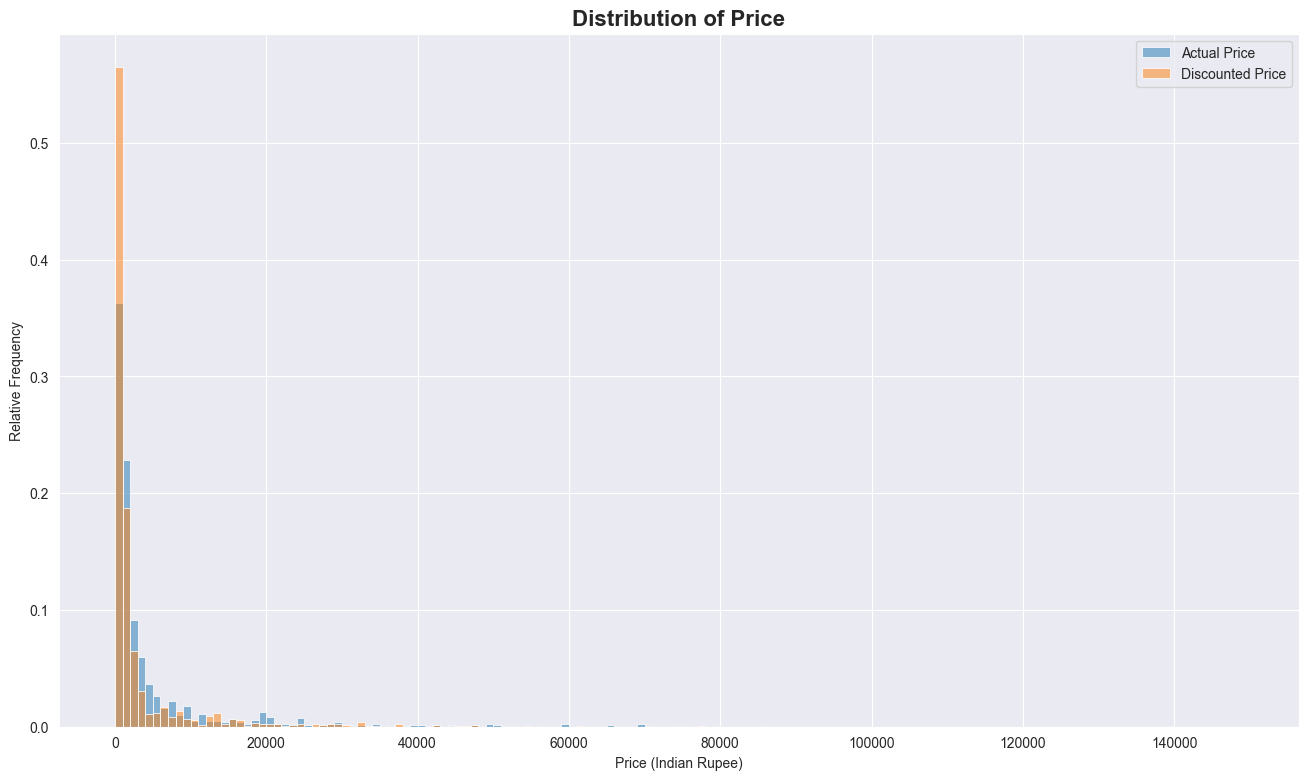

<Figure size 640x480 with 0 Axes>

In [26]:
# create a relative frequency histogram of price
plt.figure(figsize=(16,9))
sns.histplot(data=sales,
            x='actual_price',
            stat='probability',
            label='Actual Price',
            alpha=0.5,
            bins=(range(0,150000,1000)))
sns.histplot(data=sales,
            x='discounted_price',
            stat='probability',
            label='Discounted Price',
            alpha=0.5,
            bins=(range(0,150000,1000)))

# add in the title and labels
plt.title('Distribution of Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Price (Indian Rupee)')
plt.ylabel('Relative Frequency')

# add the legend
plt.legend()

plt.show()
plt.clf()

From the descriptive statistics and histogram, it's clear that both `actual_price` and `discounted_price` are skewed to the right. This presents the possibility of upper outliers. I will use the 1.5 IQR rule to check if there are any, and how many there are.

In [27]:
# define the iqrs
actual_iqr = sales['actual_price'].quantile(0.75) - sales['actual_price'].quantile(0.25)
discounted_iqr = sales['discounted_price'].quantile(0.75) - sales['discounted_price'].quantile(0.25)

# define the upper fences
actual_upper_fence = sales['actual_price'].quantile(0.75) + 1.5 * actual_iqr
discounted_upper_fence = sales['discounted_price'].quantile(0.75) + 1.5 * discounted_iqr

# find the values at or beyond the upper fence
actual_upper_outliers = sales[sales['actual_price'] >= actual_upper_fence]
discounted_upper_outliers = sales[sales['discounted_price'] >= discounted_upper_fence]

# find the percentage of values that are outliers
actual_outlier_pct = round(100 * len(actual_upper_outliers) / len(sales))
discounted_outlier_pct = round(100 * len(discounted_upper_outliers) / len(sales))

print(f'UPPER OUTLIERS\n--------------')
print(f'Actual Price: {len(actual_upper_outliers)}')
print(f'That\'s about {actual_outlier_pct}% of sales.')
print(f'Discounted Price: {len(discounted_upper_outliers)}')
print(f'That\'s about {discounted_outlier_pct}% of sales.')

UPPER OUTLIERS
--------------
Actual Price: 213
That's about 15% of sales.
Discounted Price: 217
That's about 15% of sales.


While outliers are sometimes removed from the dataset, I believe these outliers will actually be valuable to keep when modeling in a later phase of the project. It is a better reflection of the wide variety of products sold on Amazon.

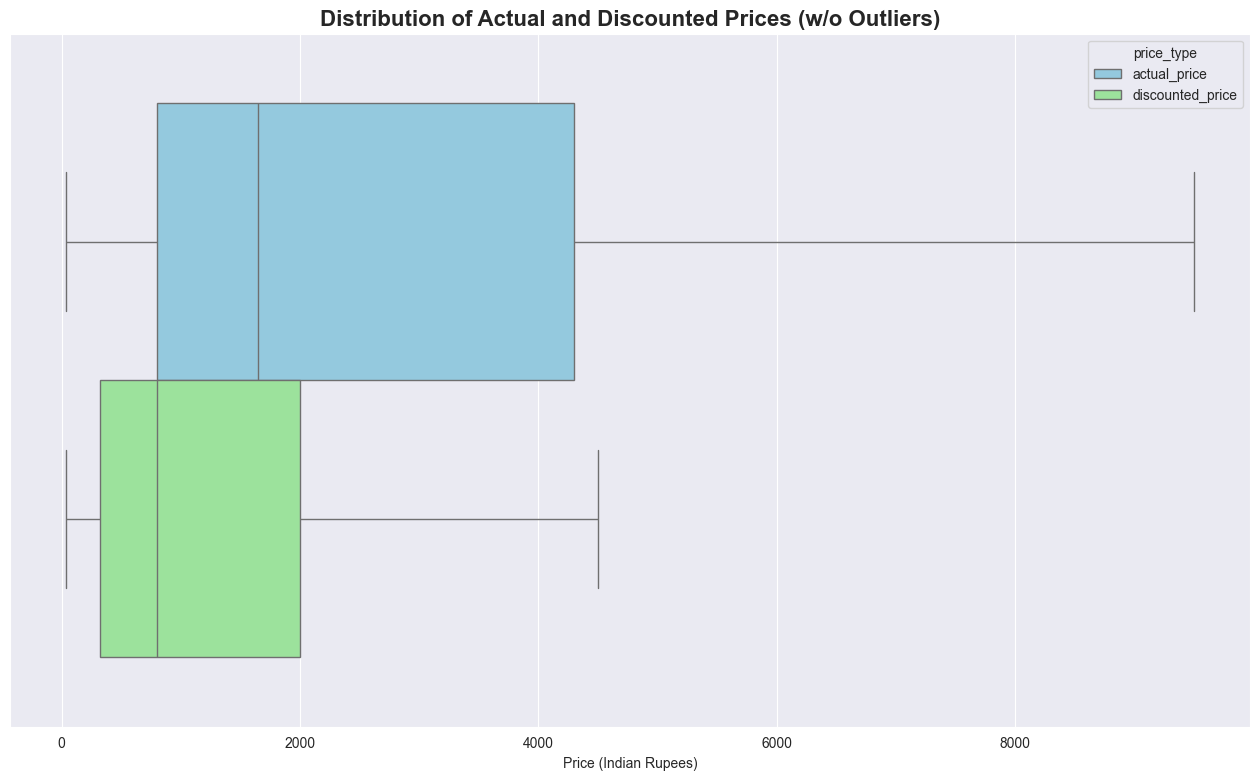

<Figure size 640x480 with 0 Axes>

In [28]:
# reshape the data for easier plotting
melted_sales = sales[['actual_price', 'discounted_price']].melt(var_name='price_type', value_name='price')

# create a parallel boxplot
plt.figure(figsize=(16, 9))
sns.boxplot(data=melted_sales, 
            x='price', 
            hue='price_type',
            palette={'actual_price':'skyblue', 'discounted_price':'lightgreen'},
            showfliers=False)

# add the title and labels
plt.title('Distribution of Actual and Discounted Prices (w/o Outliers)',
         fontweight='heavy',
         size=16)
plt.ylabel('')
plt.xlabel('Price (Indian Rupees)')

# save the figure
plt.savefig('/Users/ajgafford/Documents/Projects/Python/Kaggle/Amazon/Plots/price_parallel_boxplot.png',
           bbox_inches='tight',
           dpi=300)

plt.show()
plt.clf()

I removed the outliers to better show the remaining 85% of the data. Even with those outliers removed, the distribution of prices is skewed to the right, as indicated by these boxplots. There is less variance in `discounted_price`, as evidenced by the smaller IQR. This may reflect more standardized discounting patterns. 

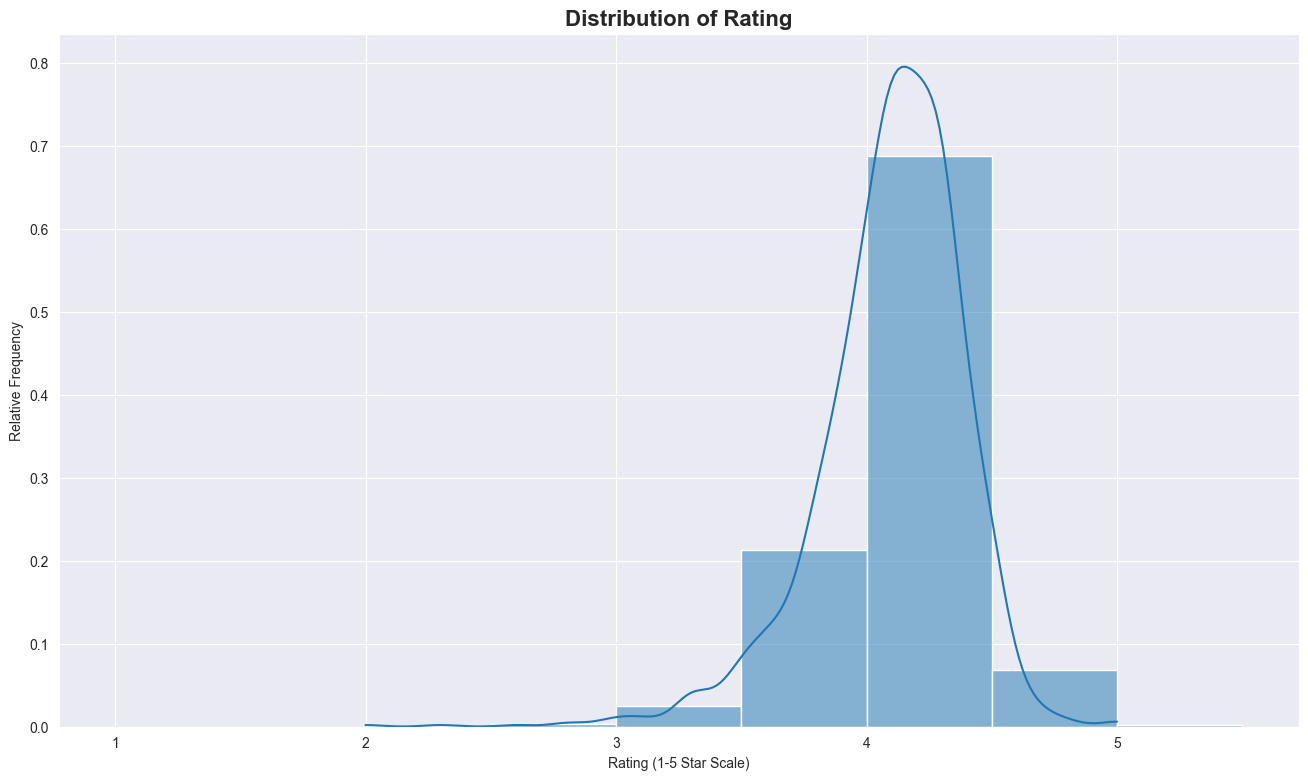

<Figure size 640x480 with 0 Axes>

In [29]:
# create a relative frequency histogram of rating
plt.figure(figsize=(16,9))
sns.histplot(data=sales,
            x='rating',
            stat='probability',
            bins=np.arange(1,6,0.5),
            kde=True)

# add the title and labels
plt.title('Distribution of Rating',
         fontweight='heavy',
         size=16)
plt.xlabel('Rating (1-5 Star Scale)')
plt.ylabel('Relative Frequency')

plt.savefig('/Users/ajgafford/Documents/Projects/Python/Kaggle/Amazon/Plots/rating_histogram.png')

plt.show()
plt.clf()

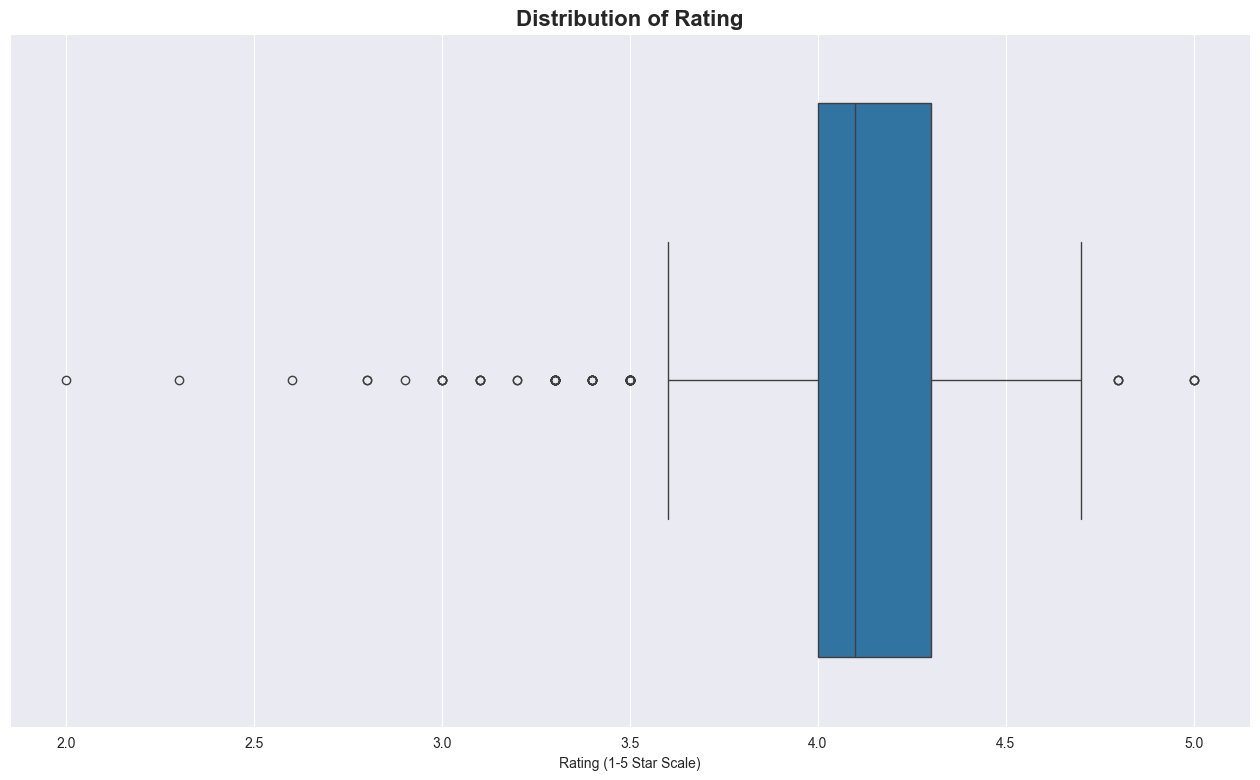

<Figure size 640x480 with 0 Axes>

In [30]:
# create a boxplot of rating
plt.figure(figsize=(16,9))
sns.boxplot(data=sales,
           x='rating')

# add the title and labels
plt.title('Distribution of Rating',
         fontweight='heavy',
         size=16)
plt.xlabel('Rating (1-5 Star Scale)')

plt.show()
plt.clf()

`rating` is more skewed to the left than it appeared from the comparison of the median and mean. There are also outliers present (according to the 1.5 IQR Rule, represented in the boxplot). These definitely do not need to be removed. While these ratings are outliers in this sample, these ratings are within the realm of possibilities for all rated products and give a good representation of the quality of products.

In [31]:
skew_rating = sales['rating'].skew()
print(f'Skew: {skew_rating}')

kurt_rating = sales['rating'].kurtosis()
print(f'Kurtosis: {kurt_rating}')

Skew: -1.2433428230213721
Kurtosis: 4.364576232301367


The negative skew confirms the leftward lean, but again it's slight. The kurtosis being larger than 3 indicates the peak is sharper than Normally distributed data with heavier tails.

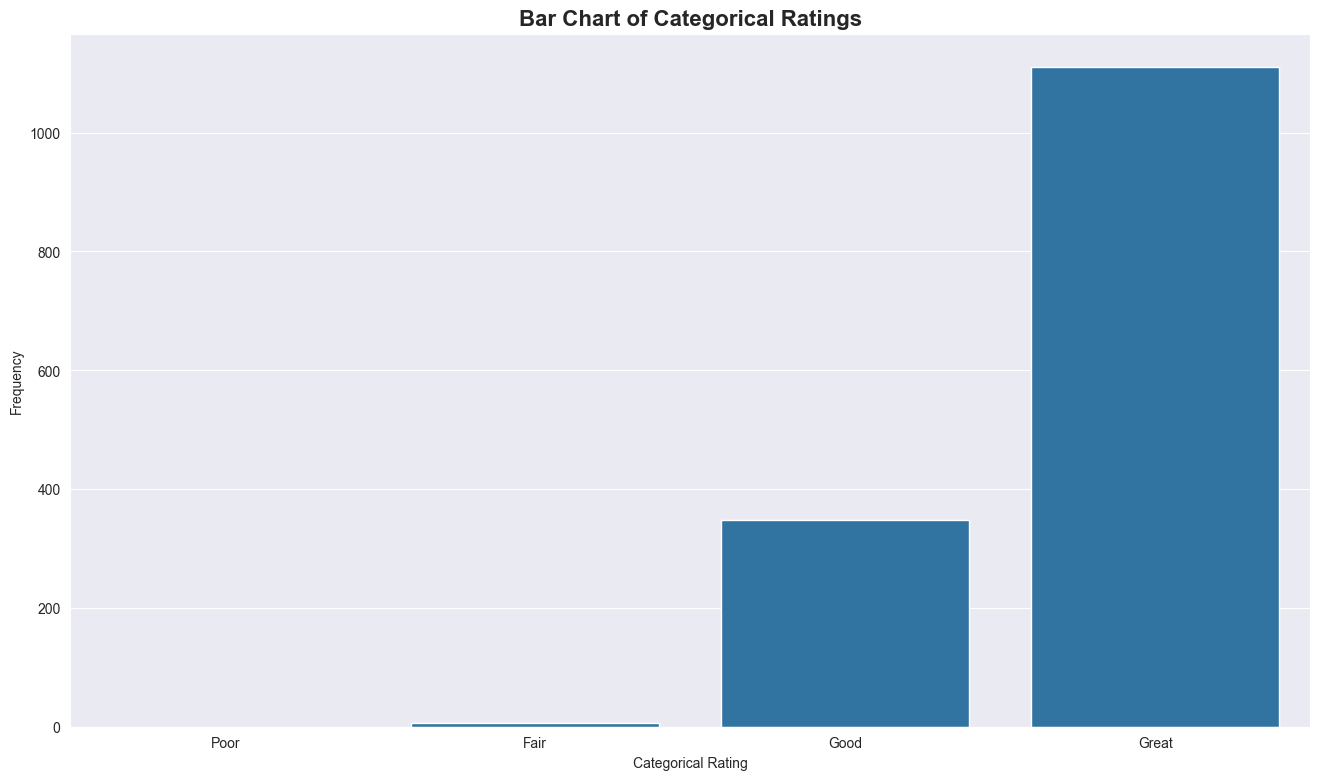

<Figure size 640x480 with 0 Axes>

In [32]:
# create a bar chart of categorical rating
plt.figure(figsize=(16,9))
sns.countplot(data=sales,
           x='rating_cat')

# add in the title and labels
plt.title('Bar Chart of Categorical Ratings',
         fontweight='heavy',
         size=16)
plt.xlabel('Categorical Rating')
plt.ylabel('Frequency')

plt.show()
plt.clf()

As expected, because 75% of the ratings are at or above 4 stars, products rated as 'Great' dominate. This indicates that the vast majority of products in this sample are 3 to 5 star products. This indicates that Amazon's quality of products is consistently good to great.

While discussing ratings, it would be natural to look at the common words used in each review. For this, I'll be using the `WordCloud` package.

In [33]:
# import the package
from wordcloud import WordCloud

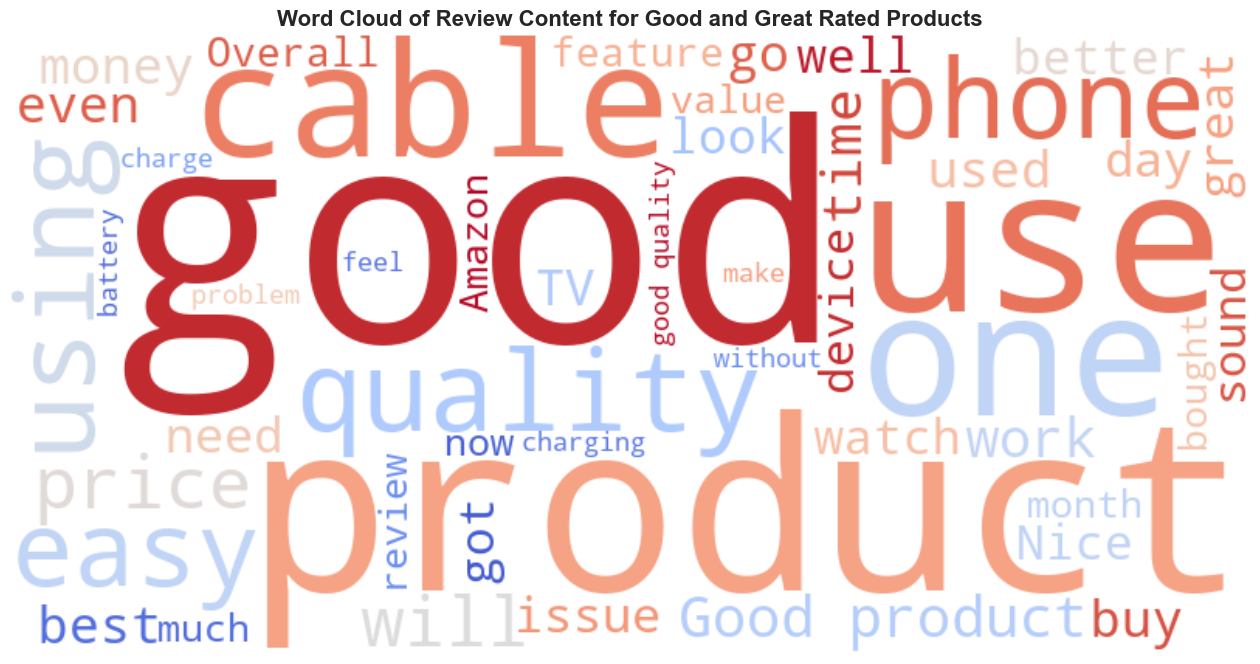

<Figure size 640x480 with 0 Axes>

In [34]:
# isolate the text
text = ' '.join(sales['review_content'][(sales['rating_cat'] == 'Good') | (sales['rating_cat'] == 'Great')])

# create the word cloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      max_words=50, 
                      background_color='white', 
                      colormap='coolwarm').generate(text)

# display the word cloud
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Content for Good and Great Rated Products',
         fontweight='heavy',
         size=16)

plt.show()
plt.clf()

The word cloud does reveal that 'Good' to 'Great' products likely are quality products that are possibly easy to use, have strong features, and are priced well. Some words like 'cable' appear big and red, so this probably indicates that cables are highly sold and reviewed on Amazon.

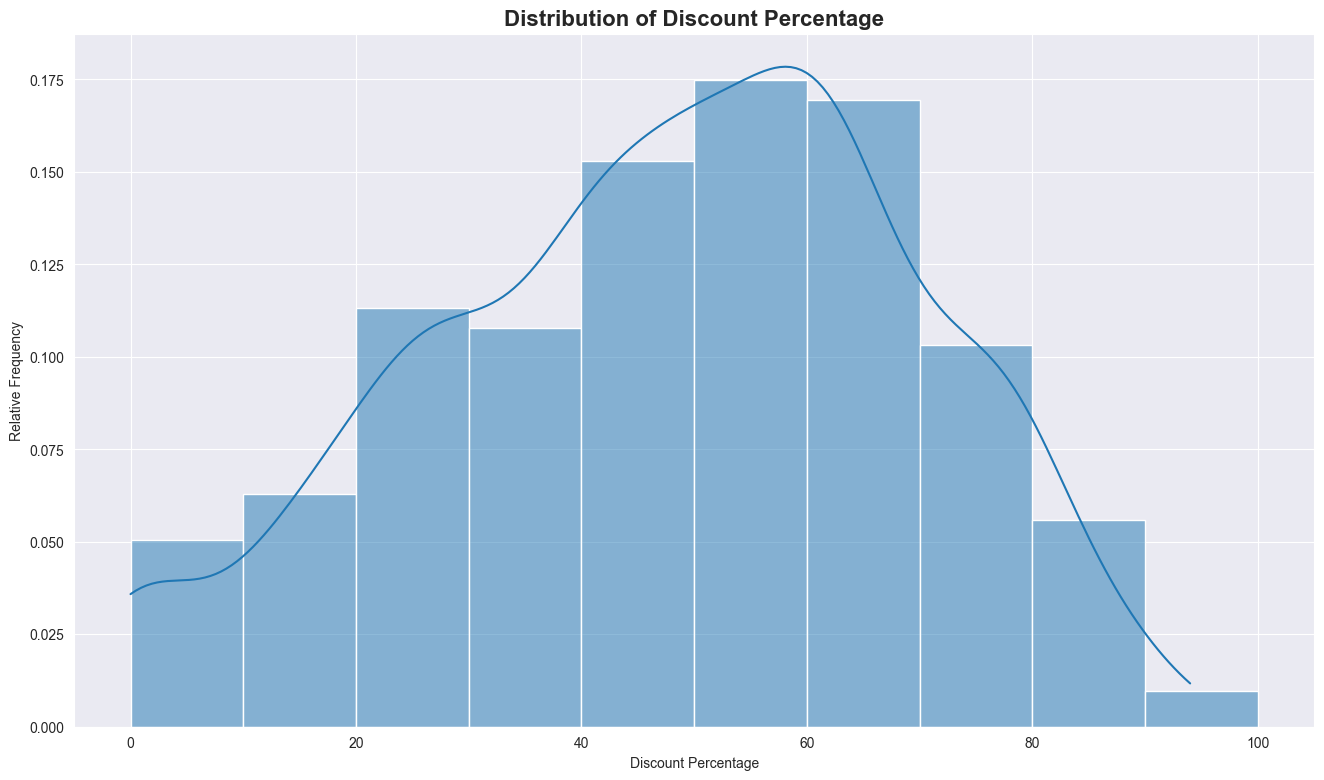

<Figure size 640x480 with 0 Axes>

In [35]:
# create a relative frequency histogram of discount_percentage
plt.figure(figsize=(16,9))
sns.histplot(data=sales,
            x='discount_percentage',
            stat='probability',
            kde=True,
            bins=range(0,110,10))

# add the title and labels
plt.title('Distribution of Discount Percentage',
         fontweight='heavy',
         size=16)
plt.xlabel('Discount Percentage')
plt.ylabel('Relative Frequency')

plt.show()
plt.clf()

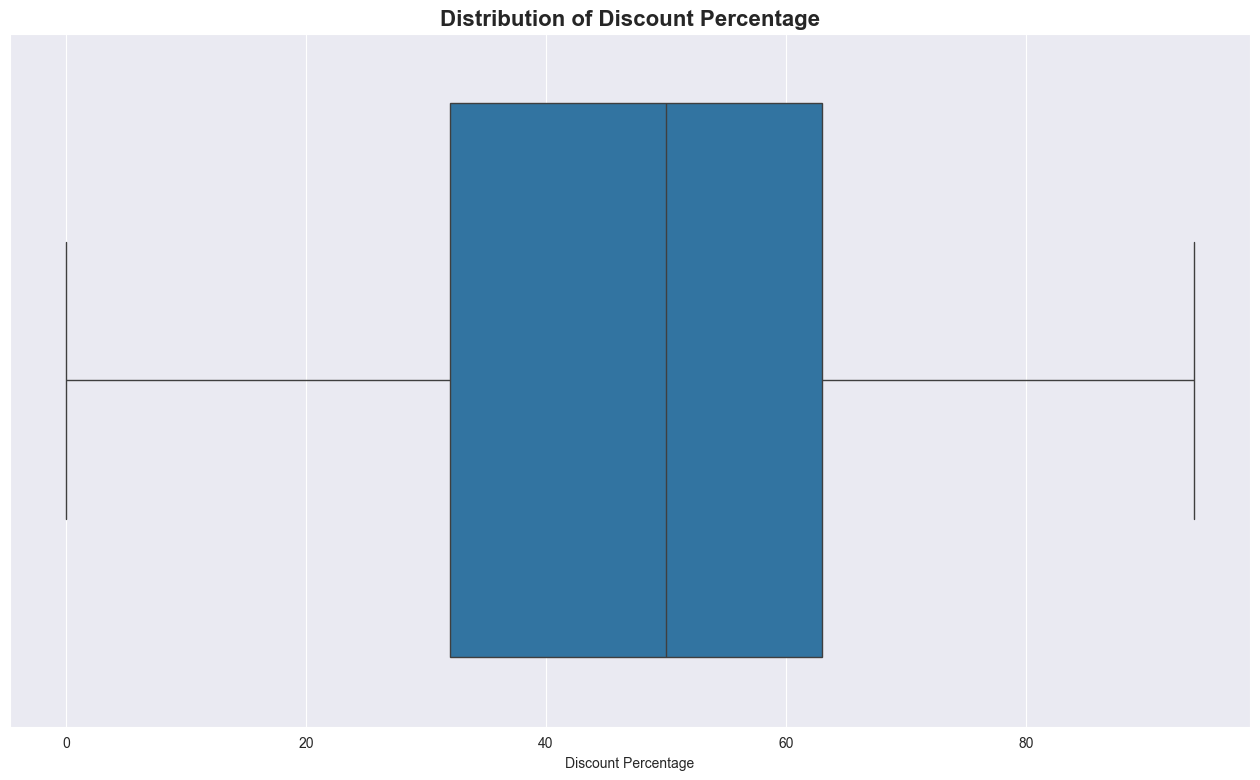

<Figure size 640x480 with 0 Axes>

In [36]:
# create a boxplot of discount_percentage
plt.figure(figsize=(16,9))
sns.boxplot(data=sales,
           x='discount_percentage')

# add the title and labels
plt.title('Distribution of Discount Percentage',
         fontweight='heavy',
         size=16)
plt.xlabel('Discount Percentage')

plt.show()
plt.clf()

In [37]:
skew_pct = sales['discount_percentage'].skew()
print(f'Skew: {skew_pct}')

kurt_pct = sales['discount_percentage'].kurtosis()
print(f'Kurtosis: {kurt_pct}')

Skew: -0.2905318638244812
Kurtosis: -0.5807285701079969


Visually, I see what I noticed from the descriptive statistics. `discount_percentage` is slightly skewed to the left, boarding on being roughly symmetric. This is backed up by the skew being negative, but close to zero. It's also not very mound-shaped. It's a lot flatter than Normally distributed data, as evidenced by the shape and the kurtosis close to 0. It does not contain any outliers.

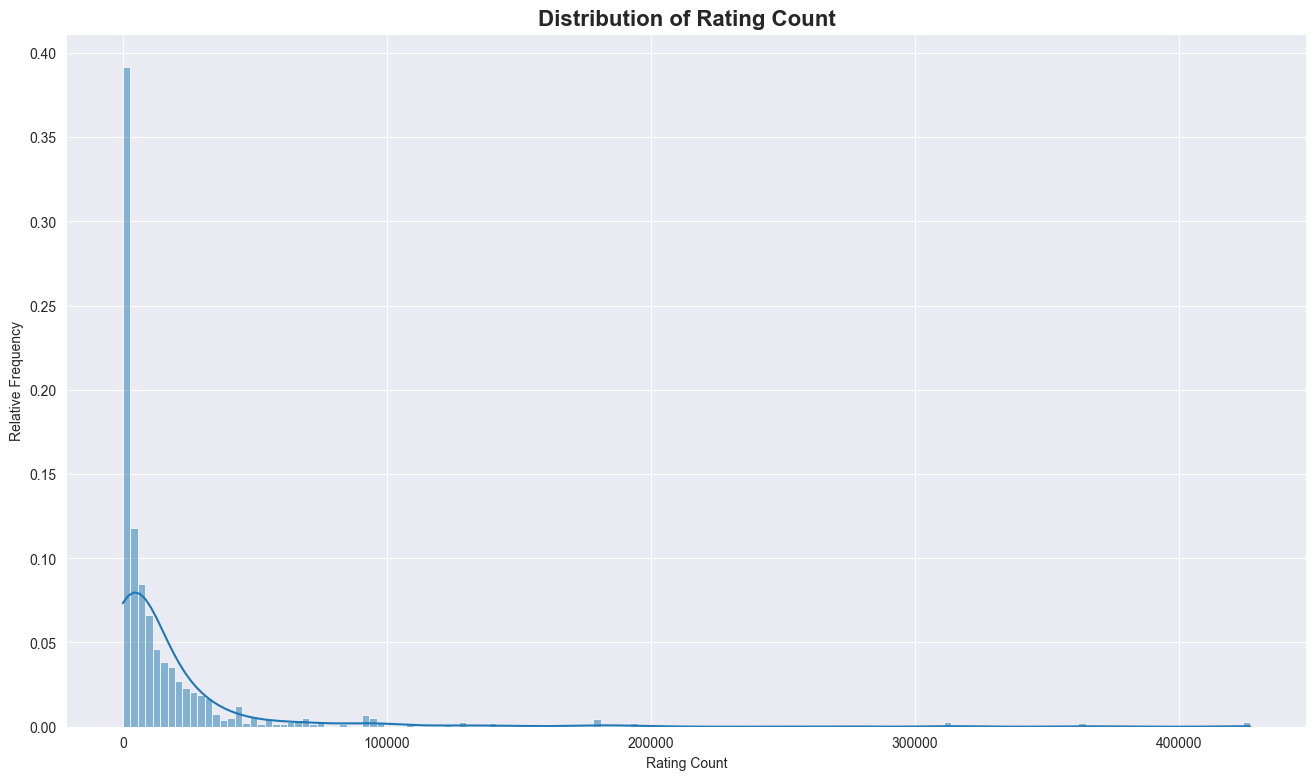

<Figure size 640x480 with 0 Axes>

In [38]:
# create a relative frequency histogram of rating_count
plt.figure(figsize=(16,9))
sns.histplot(data=sales,
            x='rating_count',
            stat='probability',
            kde=True)

# add the title and labels
plt.title('Distribution of Rating Count',
         fontweight='heavy',
         size=16)
plt.xlabel('Rating Count')
plt.ylabel('Relative Frequency')

plt.show()
plt.clf()

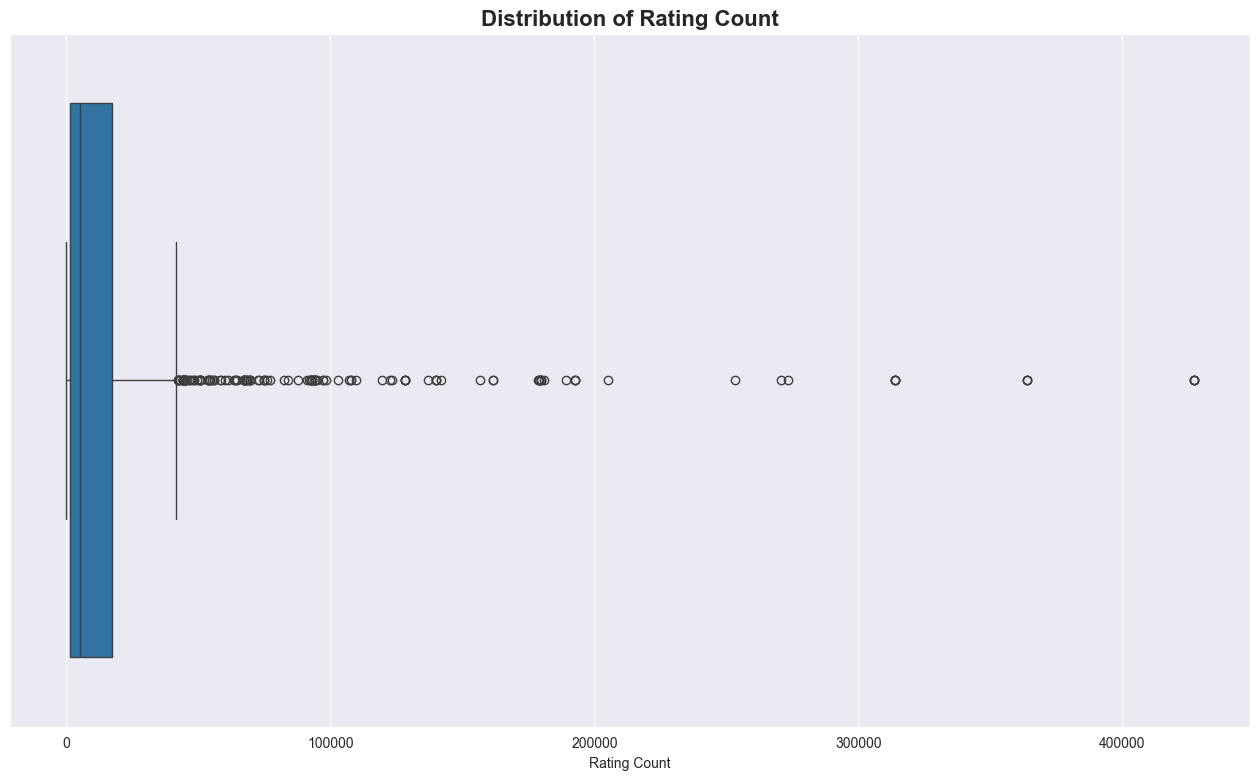

<Figure size 640x480 with 0 Axes>

In [39]:
# create a boxplot of rating_count
plt.figure(figsize=(16,9))
sns.boxplot(data=sales,
           x='rating_count')

# add the title and labels
plt.title('Distribution of Rating Count',
         fontweight='heavy',
         size=16)
plt.xlabel('Rating Count')

plt.show()
plt.clf()

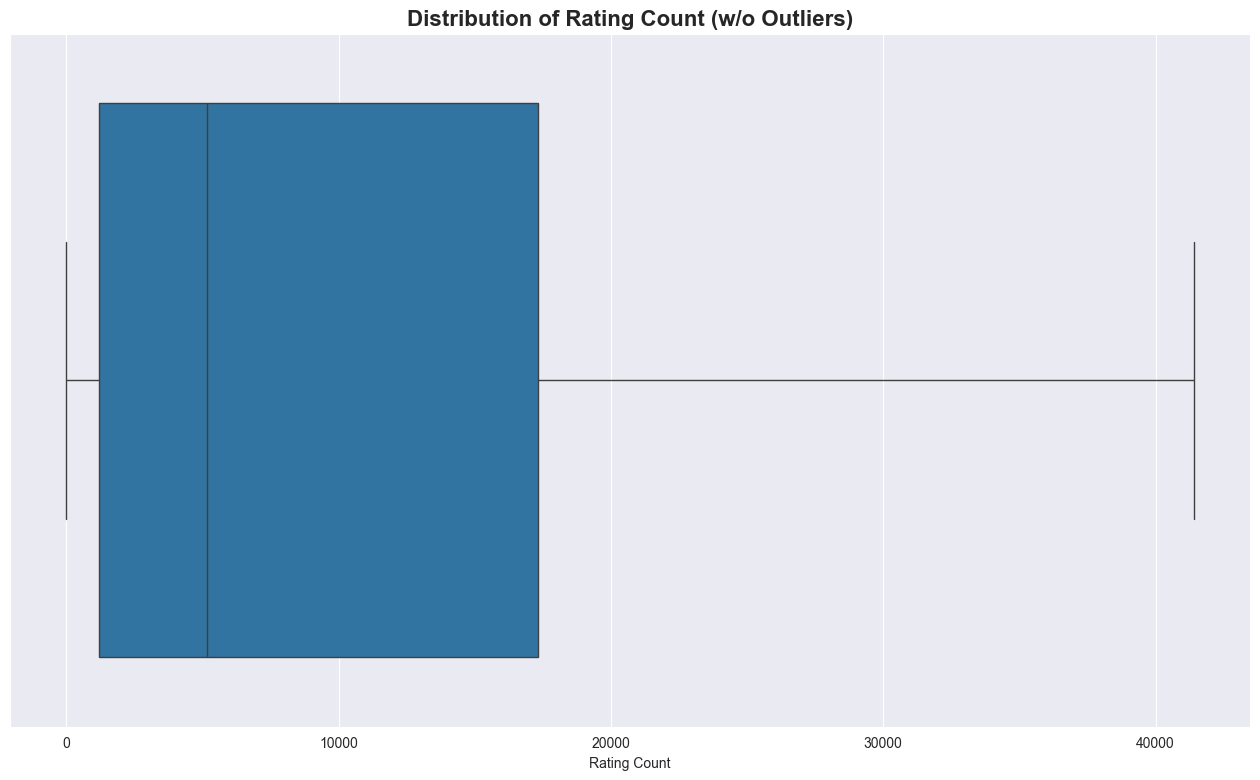

<Figure size 640x480 with 0 Axes>

In [40]:
# create a boxplot of rating_count, sans outliers
plt.figure(figsize=(16,9))
sns.boxplot(data=sales,
           x='rating_count',
           showfliers=False)

# add the title and labels
plt.title('Distribution of Rating Count (w/o Outliers)',
         fontweight='heavy',
         size=16)
plt.xlabel('Rating Count')

plt.show()
plt.clf()

Again, I receive confirmation that the number of ratings for a product is highly skewed to the right and highly variable.

Let's check on the relationships between two variables!

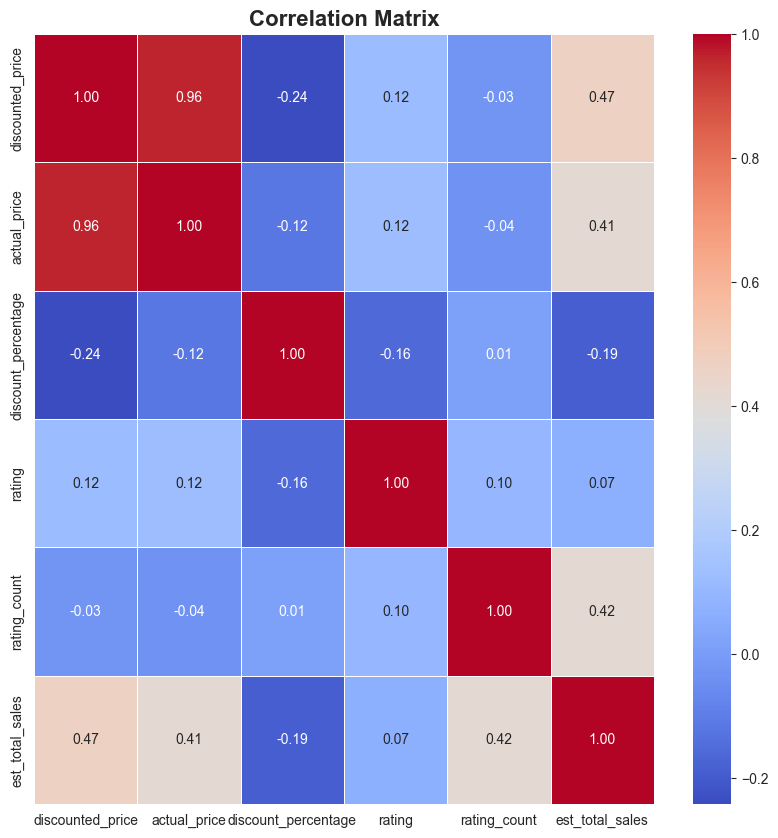

<Figure size 640x480 with 0 Axes>

In [41]:
# create a correlation matrix (heatmap) of the quantitative variables
plt.figure(figsize=(10,10))
corr_matrix = sales[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'est_total_sales']].corr()
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f', 
            linewidths=0.5)

# add the title
plt.title('Correlation Matrix',
         fontweight='heavy',
         size=16)

plt.show()
plt.clf()

For determining the strength of the linear relationship between two variables, I will use the following guidelines:

| Range | Strength |
| :-: | :-: |
| $ |r| \geq 0.8 $ | Very Strong |
| $ 0.6 \leq |r| < 0.8 $ | Strong |
| $ 0.4 \leq |r| < 0.6 $ | Moderate |
| $ 0.2 \leq |r| < 0.4 $ | Weak |
| $ r| < 0.2 $ | Very Weak |

With this in mind, the correlation matrix provides the following insights:

- The correlation between `actual_price` and `discounted_price` is strong and positive. As `actual_price` increases, `discounted_price` increases. The two variables are tightly clustered together.
- The next strongest correlation is between `discounted_price` and `est_total_sales`. This is not surprising, as `est_total_sales` was created using `discounted_sales` and `rating_count` (which also has a moderate correlation).
- The correlation between `discounted_price` or `discount_percentage` and `rating` are weak and very weak, respectively. This indicates that just because an item is sold at a discount doesn't mean it will earn a strong rating. There are other factors at play when determining the rating of a product. As indicated by the word cloud, the quality of the product in conjunction with its price likely makes a product more highly rated.

Further analysis will reveal if a linear model is indeed appropriate for these variables.

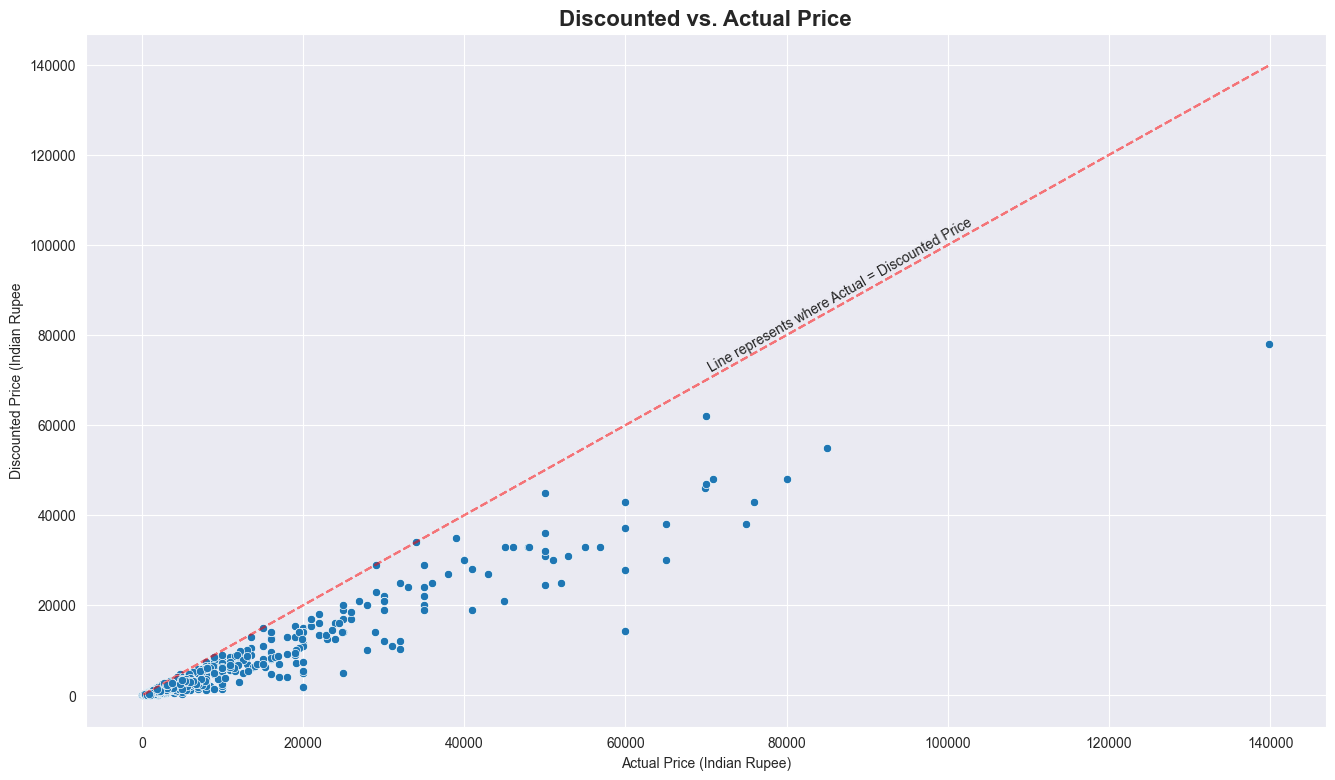

<Figure size 640x480 with 0 Axes>

In [42]:
# create a scatterplot of discounted_price vs. actual_price
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='actual_price',
               y='discounted_price')

# add the title and labels
plt.title('Discounted vs. Actual Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Actual Price (Indian Rupee)')
plt.ylabel('Discounted Price (Indian Rupee')

# add in the line y = x for 
# context and to visualize where
# no discount was applied
plt.plot(sales['actual_price'],
         sales['actual_price'],
         color='red',
         linestyle='--',
         alpha=0.5)

# add a label for the line
plt.text(70000,
         72000,
         'Line represents where Actual = Discounted Price',
         rotation=29.4)

plt.show()
plt.clf()

We can see that the prices are tightly grouped together, reinforcing that the relationship is strong. Based on the line in the scatterplot, we do see that some products sell for very close to their actual price, but the vast majority are discounted. An interesting observation of note is that once `actual_price` gets beyond around 20,000 rupees we start to see more variance in `discounted_price`. This likely indicates that the linear model might not be appropriate once we reach a certain threshold. There may be a more nuanced relationship between the variables.

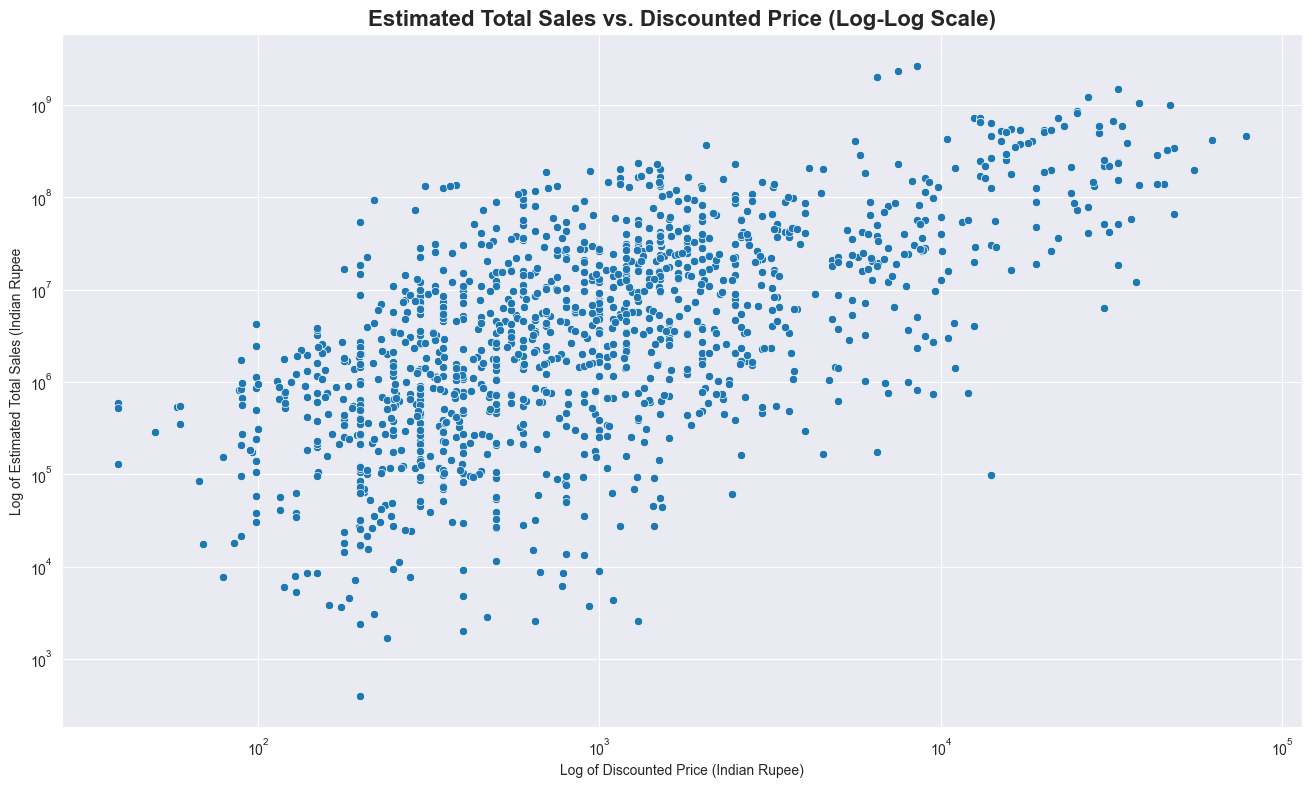

<Figure size 640x480 with 0 Axes>

In [43]:
# create a scatterplot of est_total_sale vs. discounted_price
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='discounted_price',
               y='est_total_sales')

# change to log-log
plt.xscale('log')
plt.yscale('log')

# add the title and labels
plt.title('Estimated Total Sales vs. Discounted Price (Log-Log Scale)',
         fontweight='heavy',
         size=16)
plt.xlabel('Log of Discounted Price (Indian Rupee)')
plt.ylabel('Log of Estimated Total Sales (Indian Rupee')

plt.show()
plt.clf()

It's not surprising to see a correlation between `discounted_price` and `est_total_sales` since I calculated the total sales using the product's discounted price.

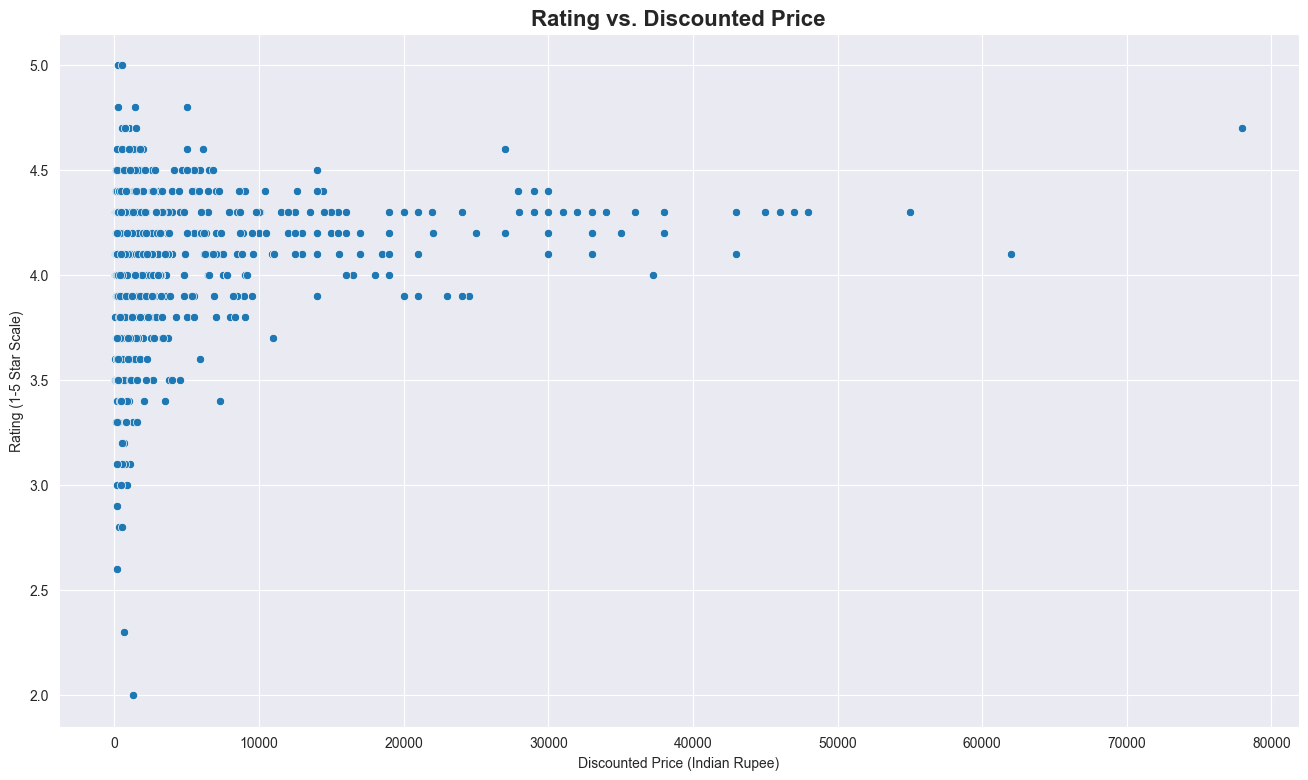

<Figure size 640x480 with 0 Axes>

In [44]:
# create a scatterplot of rating vs. discounted_price
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='discounted_price',
               y='rating')

# add the title and labels
plt.title('Rating vs. Discounted Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Discounted Price (Indian Rupee)')
plt.ylabel('Rating (1-5 Star Scale)')

plt.show()
plt.clf()

Visually, this confirms what the correlation matrix displays. The relationship between `discounted_price` and `rating` is weak, but it's more clear that there isn't really a linear relationship. As the discounted price of the product increases, we do see that the products are tending to be more highly rated, but there are likely other factors at play. There could be a logarithmic relationship.

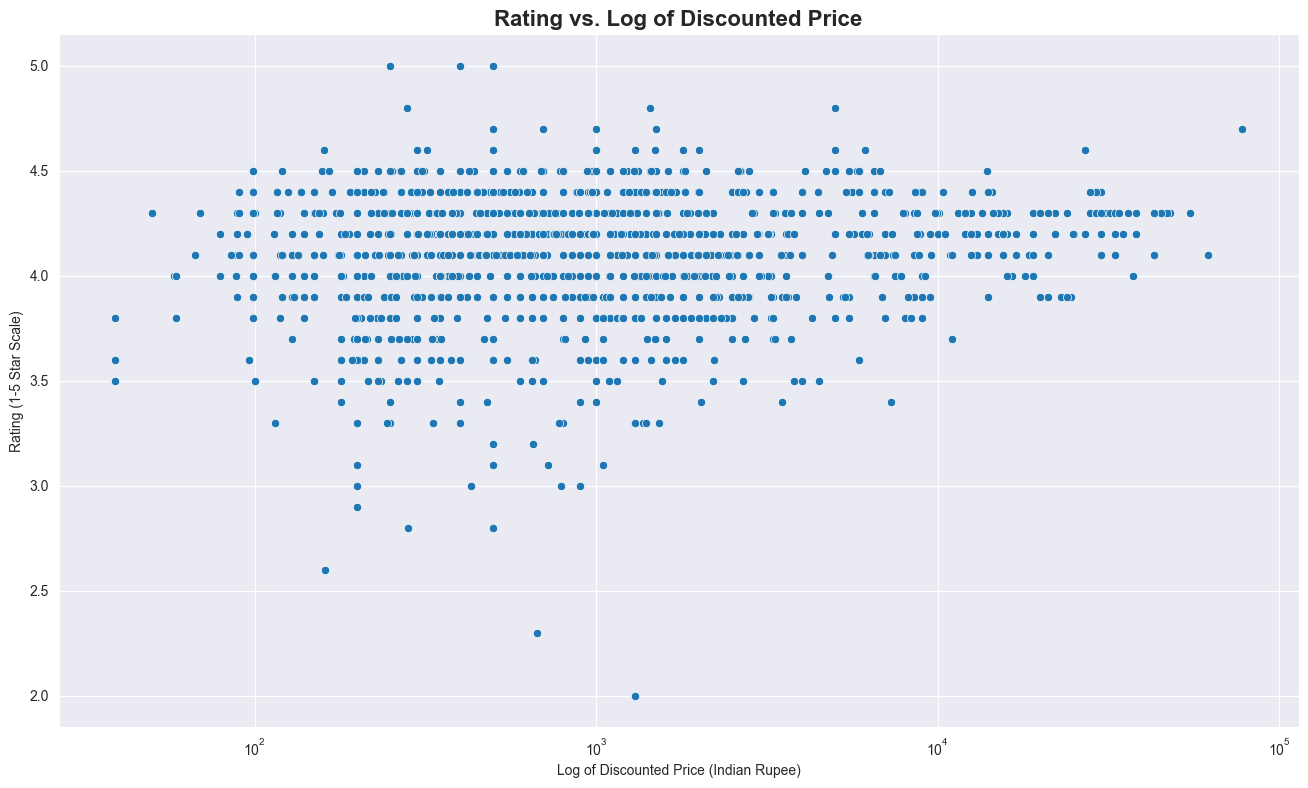

<Figure size 640x480 with 0 Axes>

In [45]:
# create a scatterplot of rating vs. log of discounted_price
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='discounted_price',
               y='rating')

# scale the x-axis to log
plt.xscale('log')

# add the title and labels
plt.title('Rating vs. Log of Discounted Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Log of Discounted Price (Indian Rupee)')
plt.ylabel('Rating (1-5 Star Scale)')

plt.show()
plt.clf()

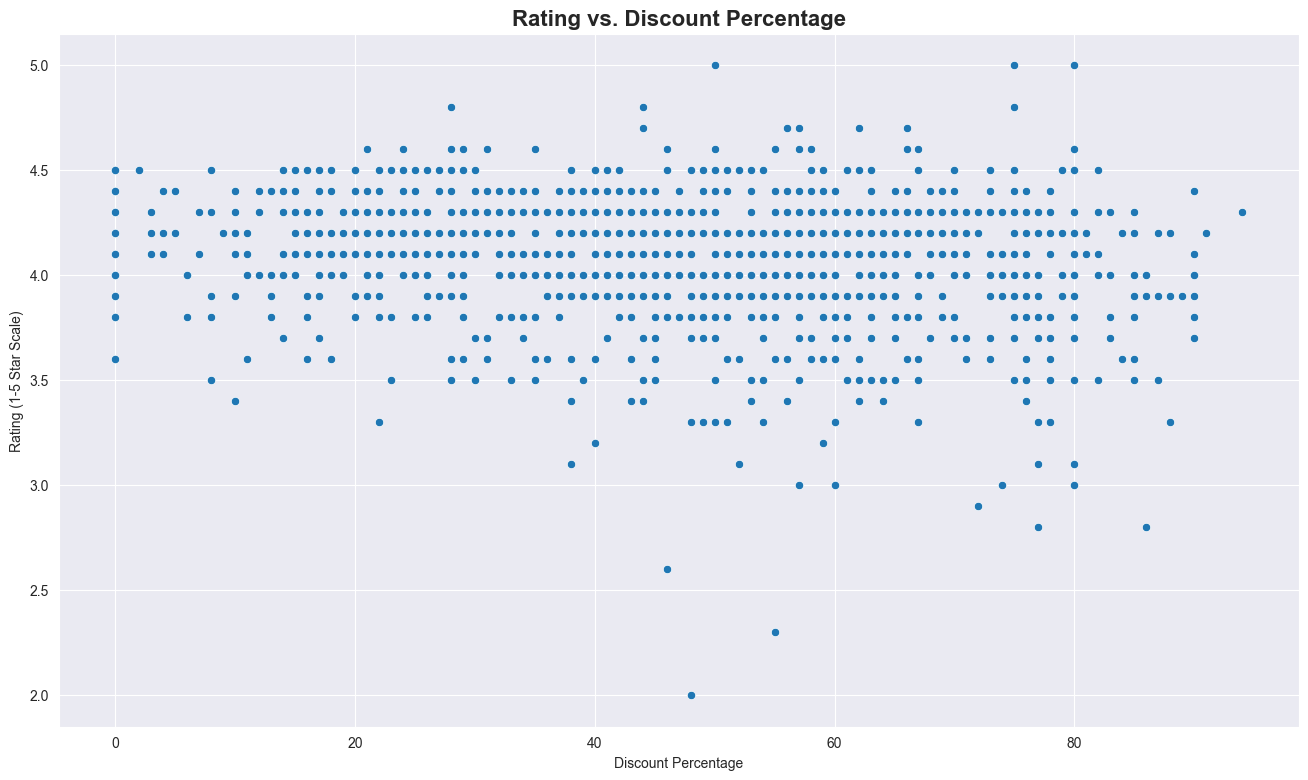

<Figure size 640x480 with 0 Axes>

In [46]:
# create a scatterplot of rating vs. discount_percentage
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='discount_percentage',
               y='rating')

# add the title and labels
plt.title('Rating vs. Discount Percentage',
         fontweight='heavy',
         size=16)
plt.xlabel('Discount Percentage')
plt.ylabel('Rating (1-5 Star Scale)')

plt.show()
plt.clf()

This relationship appears to be linear, but it is weak, as indicated by the correlation matrix. The direction is also negative. There is *some* evidence that the more a product is discounted, the lower its rating tends to be, but it's weak evidence. This may suggest something of the quality of the product. The product may need to be discounted significantly for consumers to buy lower quality items.

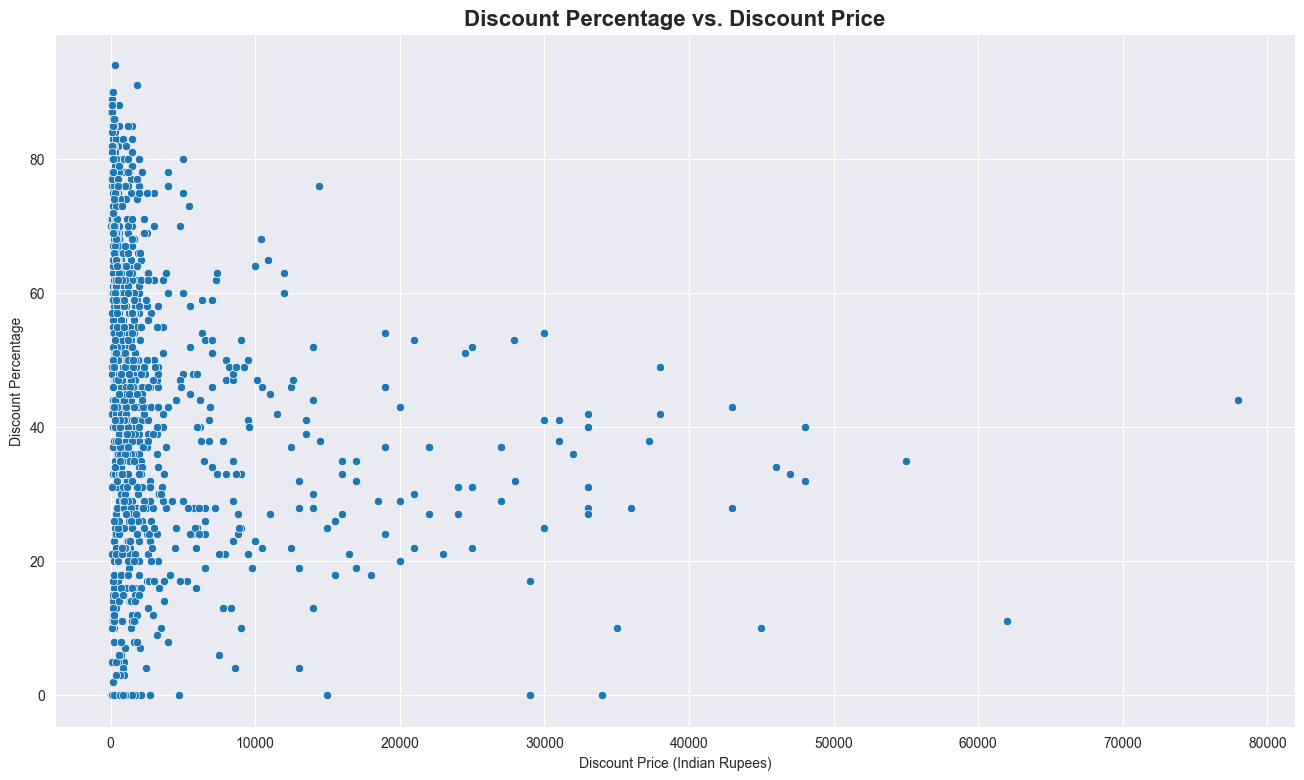

<Figure size 640x480 with 0 Axes>

In [47]:
# create a scatterplot of rating vs. discount_percentage
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='discounted_price',
               y='discount_percentage')

# log scale on the x-axis
# plt.xscale('log')

# add the title and labels
plt.title('Discount Percentage vs. Discount Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Discount Price (Indian Rupees)')
plt.ylabel('Discount Percentage')

plt.show()
plt.clf()

As `discounted_price` goes up, `discount_percentage` tends to go down. This makes intuitive sense, as smaller discounted prices would tend to mean a larger proportion of the price was cut off. The association is weak, though.

Now, I'll use SQLite to help query the data on the `department`, `sub_department`, and `product_type` level.

In [48]:
# create a connection to sqlite
conn = sqlite3.connect(':memory:')
# write the df to a sql table
sales.to_sql('sales', conn, if_exists="replace", index=False)

1465

Which department sold the most products?

In [49]:
query = """
SELECT 
    department AS Department, 
    COUNT(*) AS Products
FROM 
    sales
GROUP BY 
    Department
ORDER BY 
    Products DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

              Department  Products
0            Electronics       526
1  Computers&Accessories       453
2           Home&Kitchen       448
3         OfficeProducts        31
4     MusicalInstruments         2
5        HomeImprovement         2
6             Toys&Games         1
7    Health&PersonalCare         1
8          Car&Motorbike         1


In this sample, Electronics, Computers and Accessories, and Home and Kitchen dominate. There is also an obvious skew to the representation of departments in this sample. Only 3 of the 9 departments represent the vast majority of the sales. This will important to account for in the modeling phase.

What are the top 10 product types sold?

In [50]:
query = """
SELECT 
    department AS Department, 
    product_type AS Product, 
    COUNT(*) AS 'Total Sold',
    ROUND(AVG(discounted_price), 2) AS 'Discounted Price'
FROM 
    sales
GROUP BY 
    2
ORDER BY 
    3 DESC
LIMIT 
    10;
"""
result = pd.read_sql_query(query, conn)
print(result)

              Department           Product  Total Sold  Discounted Price
0  Computers&Accessories         USBCables         233            360.72
1            Electronics      SmartWatches          76           2339.70
2            Electronics       Smartphones          68          15754.44
3            Electronics  SmartTelevisions          63          24840.19
4            Electronics            In-Ear          52            976.17
5            Electronics    RemoteControls          49            438.94
6           Home&Kitchen     MixerGrinders          27           3004.72
7  Computers&Accessories              Mice          24            609.33
8            Electronics        HDMICables          24            406.29
9           Home&Kitchen          DryIrons          24            762.17


As I guessed when looking at the word cloud, cables are popular items sold on Amazon, representing about 16% of the products sold.

Electronics are widely represented. This shows that a wide variety of electronics are sold on Amazon.

What is each department's most sold product?

In [51]:
query = """
WITH total_sold AS (
    SELECT
        department,
        product_type,
        COUNT(*) AS products,
        ROUND(AVG(discounted_price), 2) AS 'AVG Discount Price'
    FROM
        sales
    GROUP BY
        department, product_type
),
ranked_total_sold AS (
    SELECT
        department,
        product_type,
        products,
        ROW_NUMBER() OVER (PARTITION BY department ORDER BY products DESC) AS rank
    FROM
        total_sold
)
SELECT
    department AS Department,
    product_type AS Product,
    products AS 'Total Sold'
FROM
    ranked_total_sold
WHERE
    rank = 1
ORDER BY 
    3 DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

              Department                 Product  Total Sold
0  Computers&Accessories               USBCables         233
1            Electronics            SmartWatches          76
2           Home&Kitchen           MixerGrinders          27
3         OfficeProducts    CompositionNotebooks           7
4     MusicalInstruments               Condenser           2
5          Car&Motorbike   AirPurifiers&Ionizers           1
6    Health&PersonalCare   DigitalBathroomScales           1
7        HomeImprovement  Adapters&Multi-Outlets           1
8             Toys&Games   ColouringPens&Markers           1


USB Cables are highly sold. Smart Watches are popular electronics. These products would represent ways to get into the market, or potential products to avoid because there are so many different products in the market.

Which of the major 3 departments had the highest average rating?

In [52]:
query = """
SELECT 
    department AS Department, 
    ROUND(AVG(rating),1) as AVG_Rating
FROM 
    sales
GROUP BY 
    Department
HAVING 
    COUNT(*) >= 400
ORDER BY 
    AVG_Rating DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

              Department  AVG_Rating
0  Computers&Accessories         4.2
1            Electronics         4.1
2           Home&Kitchen         4.0


Of the major 3 departments, Computers and Accessories tend to be the most highly rated. The margins between these rating is very small, though. On average, these departments produce 4 star caliber products.

Which deparment has the highest average discounted price?

In [53]:
query = """
SELECT 
    department AS Department, 
    ROUND(AVG(discounted_price), 2) AS AVG_Discount_Price,
    COUNT(*) AS Total_Sold
FROM 
    sales
GROUP BY 
    Department
ORDER BY 
    AVG_Discount_Price DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

              Department  AVG_Discount_Price  Total_Sold
0            Electronics             5965.89         526
1          Car&Motorbike             2339.00           1
2           Home&Kitchen             2330.62         448
3    Health&PersonalCare              899.00           1
4  Computers&Accessories              842.65         453
5     MusicalInstruments              638.00           2
6        HomeImprovement              337.00           2
7         OfficeProducts              301.58          31
8             Toys&Games              150.00           1


Not surprisingly, Electronics tend to be the highest priced products. It is by a large margin (over 3,000 rupees). These products are purchased regularly as well. Getting into that market could be quite lucrative.

Which department sees the largest percentage discount?

In [54]:
query = """
SELECT 
    department AS Department, 
    ROUND(AVG(discount_percentage)) AS 'AVG Discount Percentage',
    COUNT(*) AS Total_Sold
FROM 
    sales
GROUP BY 
    1
ORDER BY 
    2 DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

              Department  AVG Discount Percentage  Total_Sold
0        HomeImprovement                     58.0           2
1  Computers&Accessories                     54.0         453
2    Health&PersonalCare                     53.0           1
3            Electronics                     51.0         526
4     MusicalInstruments                     46.0           2
5          Car&Motorbike                     42.0           1
6           Home&Kitchen                     40.0         448
7         OfficeProducts                     12.0          31
8             Toys&Games                      0.0           1


Cars and Motor Bikes, and Home and Kitchen departments have a top 3 average discounted price, but at the bottom half in terms of the percentage that their prices were discounted. Office Products tend to not be discounted significantly. Electronics see a reduction by a little more than half of their actual price.

What were the top 5 sub-departments?

In [55]:
query = """
SELECT 
    sub_department AS Sub_Department, 
    COUNT(*) as Products
FROM 
    sales
GROUP BY 
    Sub_Department
ORDER BY 
    Products DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
print(result)

               Sub_Department  Products
0     Accessories&Peripherals       381
1      Kitchen&HomeAppliances       308
2        HomeTheater,TV&Video       162
3         Mobiles&Accessories       161
4  Heating,Cooling&AirQuality       116


Accessories and Appliances for the Home/Kitchen are the most popular. Generally speaking, it looks like accessories are sold a lot on Amazon.

What are the top 5 sub-departments by discounted price?

In [56]:
query = """
SELECT 
    sub_department AS 'Sub Department', 
    ROUND(AVG(discounted_price), 2) AS 'AVG Discount Price'
FROM 
    sales
GROUP BY 
    1
ORDER BY 
    2 DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
print(result)

         Sub Department  AVG Discount Price
0               Laptops            37247.00
1               Tablets            26999.00
2  HomeTheater,TV&Video            10407.12
3              Monitors             8199.00
4   Mobiles&Accessories             7134.05


Not too surprising. One would expect these items to be highly priced.

What are the top 5 sub-departments by average rating?

In [57]:
query = """
SELECT 
    sub_department AS Sub_Department, 
    ROUND(AVG(rating), 1) AS AVG_Rating
FROM 
    sales
GROUP BY 
    Sub_Department
HAVING 
    COUNT(*) >= 100
ORDER BY 
    AVG_Rating DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

               Sub_Department  AVG_Rating
0         Mobiles&Accessories         4.1
1      Kitchen&HomeAppliances         4.1
2        HomeTheater,TV&Video         4.1
3     Accessories&Peripherals         4.1
4  Heating,Cooling&AirQuality         4.0


Not much variation in the ratings.

What is each department's highest priced product?

In [58]:
query = """
WITH avg_discount AS (
    SELECT
        department,
        product_type,
        ROUND(AVG(discounted_price), 2) AS avg_discounted_price
    FROM
        sales
    GROUP BY
        department, 
        product_type
),
ranked_avg_discount AS (
    SELECT
        department,
        product_type,
        avg_discounted_price,
        ROW_NUMBER() OVER (PARTITION BY department ORDER BY avg_discounted_price DESC) AS rank
    FROM
        avg_discount
)
SELECT
    department AS Department,
    product_type AS Product,
    avg_discounted_price AS 'AVG Discount Price'
FROM
    ranked_avg_discount
WHERE
    rank = 1
ORDER BY 3 DESC;

"""
result = pd.read_sql_query(query, conn)
print(result)

              Department                        Product  AVG Discount Price
0           Home&Kitchen    Split-SystemAirConditioners            42990.00
1  Computers&Accessories             TraditionalLaptops            37247.00
2            Electronics               SmartTelevisions            24840.19
3          Car&Motorbike          AirPurifiers&Ionizers             2339.00
4         OfficeProducts  Notebooks,WritingPads&Diaries             1399.00
5    Health&PersonalCare          DigitalBathroomScales              899.00
6     MusicalInstruments                      Condenser              638.00
7        HomeImprovement         Adapters&Multi-Outlets              425.00
8             Toys&Games          ColouringPens&Markers              150.00


How are the various levels of rating related to average price?

In [59]:
query = """
SELECT 
    rating_cat AS 'Rating Scale', 
    ROUND(AVG(discounted_price), 2) AS 'AVG Discounted Price'
FROM 
    sales
GROUP BY 
    1
ORDER BY 
    2 DESC;
"""
result = pd.read_sql_query(query, conn)
print(result)

  Rating Scale  AVG Discounted Price
0        Great               3582.35
1         Good               1711.16
2         Fair                518.00


## Phase 3 Summary

From my Exploratory Data Analysis and Visualizations, I observed the following:

- `actual_price` and `discounted_price` are significantly skewed to the right. 75% of their prices are from ₹39 to ₹4,295 and ₹39 to ₹1,999 with IQRs of ₹3,495 and ₹1,674, respectively. While this means the top end of these distributions would be considered outliers, I believe these should be left in because it reflects the broader landscape of Amazon's sales.
- While the median and mean of `rating` are approximately equal, further analysis suggests that it's actually skewed slightly to the left. There are a few ratings that would be considered outliers based on the 1.5 IQR rule, but I do not think these should be excluded. This is because it better reflects the broader landscape of Amazon's sales and ratings.
- `discount_percentage` is slightly skewed to the left, if not roughly symmetric, centered around 50%. The distribution is less concentrated around the mean and thus appears more flat and evenly distributed. It does not contain any outliers.
- In terms of the correlation between two variables . . .
    - `actual_price` and `discounted_price` have strongest correlation, as evidenced by their correlation coefficient of 0.96. As `actual_price` goes up, so too does `discounted_price`. That trend is positive and strong. This seems to indicate that the actual price aligns well with the discounted price.
    - All other pairings are weakly correlated. The second strongest is the correlation between `discounted_price` and `discount_percentage`, with r = -0.24. As `discounted_price` goes up, `discount_percentage` tends to go down.
    - There is possible logarithmic relationship between `discounted_price` and `rating` that I would like to explore in the next phase.
- On a `department` level . . .
    - Electronics, Computers and Accessories, and Home and Kitchen dominate the sample, being the only three departments with triple-digit sales in the sample. This creates a notable skew in the representation of products on the department level that may need to be accounted for in the next phase.
    -  The three major departments in the sample all tend to be highly rated, as they are all at least 4-stars. Computers and Accessories have a slight advantage over the other 2.
    -  Electronics dominate in terms of average discounted sale price. This is largely due to the high priced items in Home Theater.
    -  Accessories tend to be common purchases on Amazon, as many of the sub departments seem to indicate.

---

## Phase 4: Feature Engineering and Modeling

My primary goals for this phase are as follows:

1. Use linear regression to predict `discounted_price` using `actual_price`.
2. Use one hot encoding with the categorical variables to see if I can find a better model for `discounted_price`

I'll start with building a model for `discounted_price`! For this, I'll be using the `scikit-learn` library.

In [60]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# define the independent and dependent variables
X = sales[['actual_price']]
y = sales['discounted_price']

In [62]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# initialize the linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 4117141.256919042
R² Score: 0.9185961334138264


While the MSE is quite large, it's quite small when considering that the values of prices is about ₹100,000. $ R^2 $ of about $ 0.92 $ indicates that about $ 92 $% of the variance in `discounted_price` is explained by the model, which is quote good.

In [64]:
print(f'Slope: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Slope: [0.61257686]
Intercept: -233.69925043840885


$$ \text{Equation: } \hat{y}=0.61x-233.70$$
For every $ 1 $ rupee increase in `actual_price`, the predicted `discounted_price` increases by about $ 0.61 $ rupees.

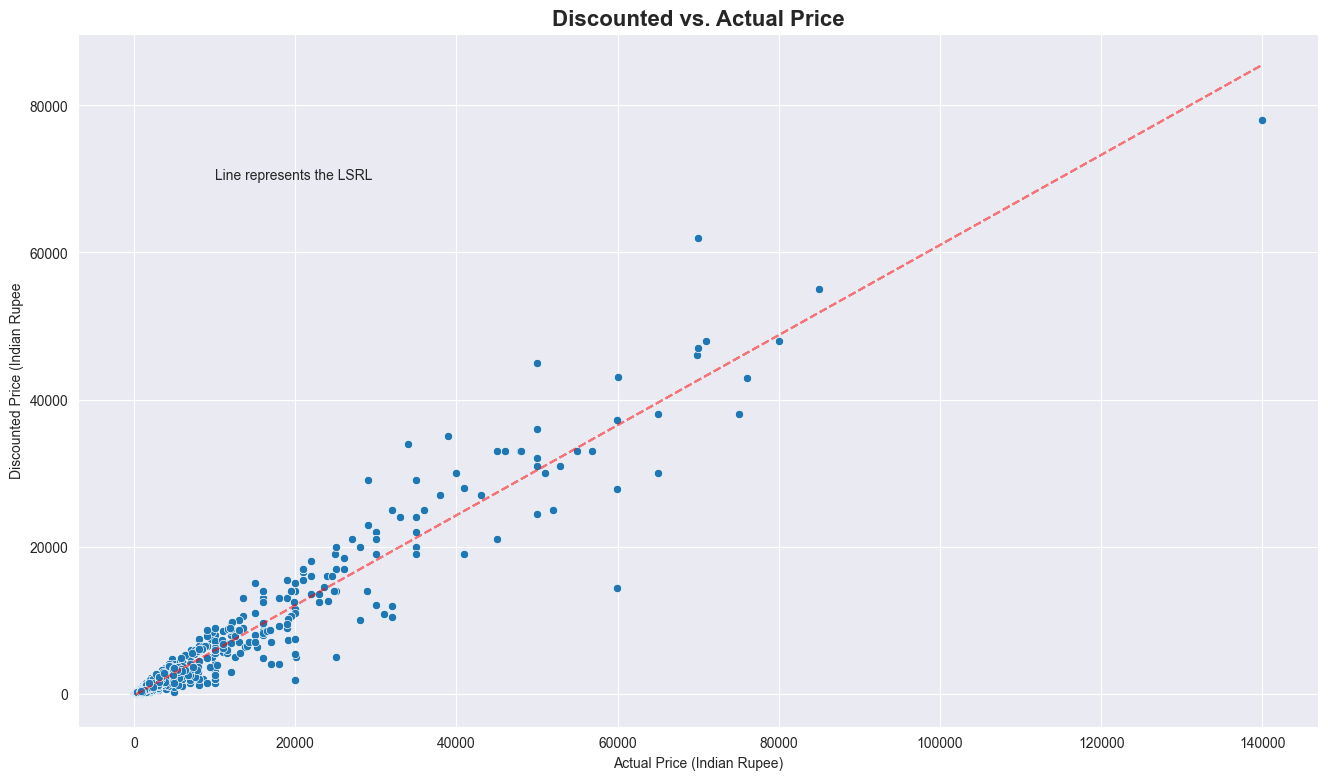

<Figure size 640x480 with 0 Axes>

In [65]:
# create the scatterplot for discounted vs. actual with the LSRL line plotted for reference
# create a scatterplot of discounted_price vs. actual_price
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='actual_price',
               y='discounted_price')

# add the title and labels
plt.title('Discounted vs. Actual Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Actual Price (Indian Rupee)')
plt.ylabel('Discounted Price (Indian Rupee')

# add in the LSRL
plt.plot(sales['actual_price'],
         model.coef_ * sales['actual_price'] + model.intercept_,
         color='red',
         linestyle='--',
         alpha=0.5)

# add in text to explain the LSRL
plt.text(10000,
        70000,
        'Line represents the LSRL')

plt.show()
plt.clf()

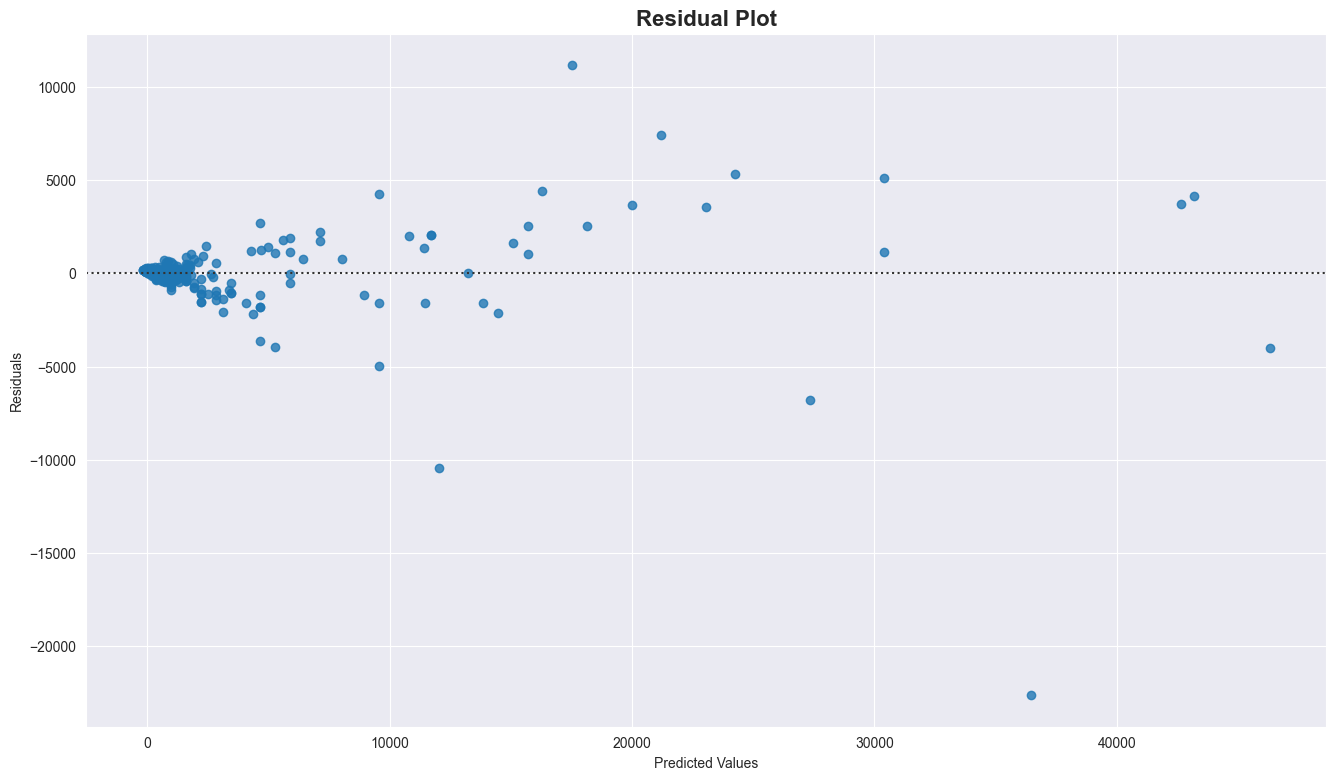

<Figure size 640x480 with 0 Axes>

In [66]:
# calculate residuals
residuals = y_test - y_pred

# create a residual plot
plt.figure(figsize=(16, 9))
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red', 'lw': 1})

# add the title and labels
plt.title('Residual Plot',
         fontweight='heavy',
         size=16)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.savefig('/Users/ajgafford/Documents/Projects/Python/Kaggle/Amazon/Plots/residual_plot.png')

plt.show()
plt.clf()

As mentioned in the EDA phase, I anticipated that higher values of `actual_price` would produce more variance in `discounted_price`. This is evident in the residual plot. Note the fanning pattern. This indicates heteroscedasticity, meaning that variance in the residuals is not consistent across all levels of `actual_price`. The linear model may seem strong based on the metrics from earlier, but it could be improved. I do not believe the linear model is appropriate. It gets weaker when predicting with higher actual costs.

In [67]:
# use a log transformation on the prices
sales['log_actual_price'] = np.log(sales['actual_price'])
sales['log_discounted_price'] = np.log(sales['discounted_price'])

In [68]:
# define the independent and dependent variables
X = sales[['log_actual_price']]
y = sales['log_discounted_price']

In [69]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# initialize the linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Slope: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 0.18910858294476
R² Score: 0.9084859329740521
Slope: [1.00508333]
Intercept: -0.7868510090975356


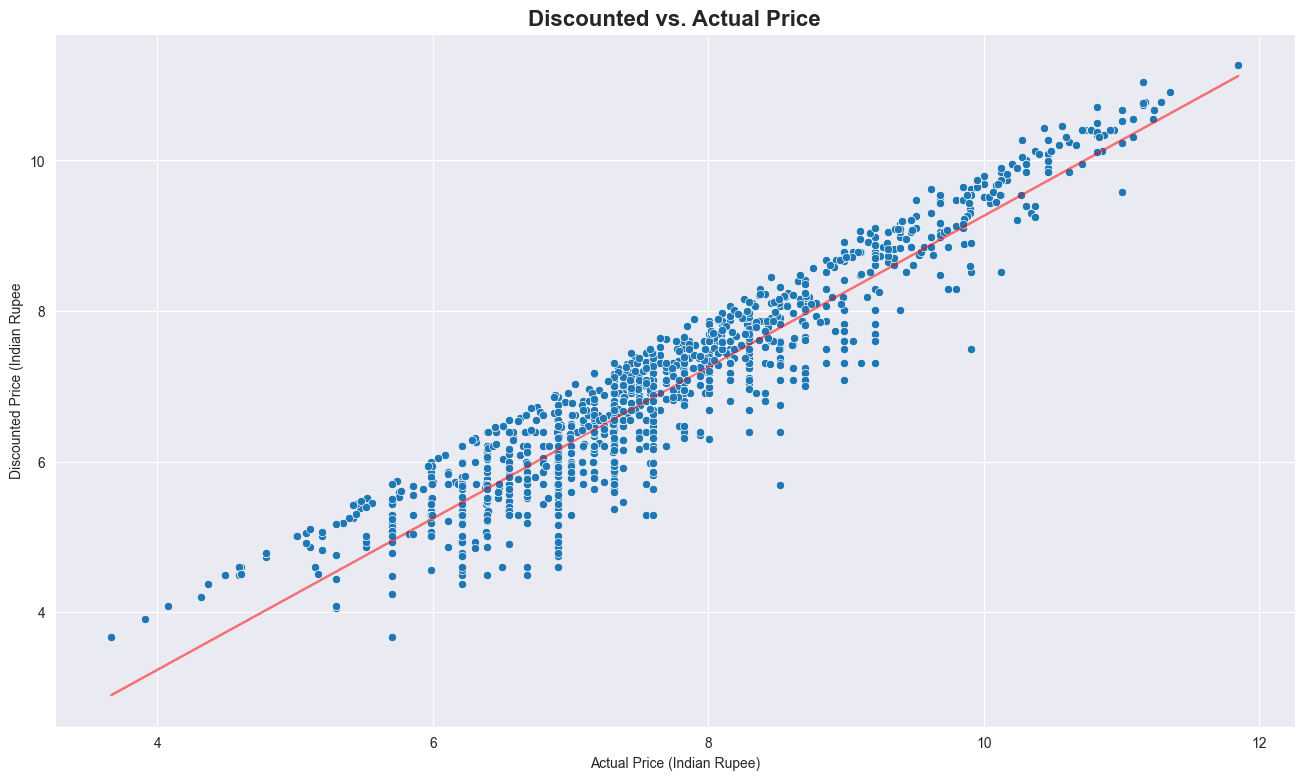

<Figure size 640x480 with 0 Axes>

In [71]:
# create the scatterplot for discounted vs. actual with the LSRL line plotted for reference
# create a scatterplot of discounted_price vs. actual_price
plt.figure(figsize=(16,9))
sns.scatterplot(data=sales,
               x='log_actual_price',
               y='log_discounted_price')

# add the title and labels
plt.title('Discounted vs. Actual Price',
         fontweight='heavy',
         size=16)
plt.xlabel('Actual Price (Indian Rupee)')
plt.ylabel('Discounted Price (Indian Rupee')

# add in the LSRL
plt.plot(sales['log_actual_price'],
         model.coef_ * sales['log_actual_price'] + model.intercept_,
         color='red',
         linestyle='-',
         alpha=0.5)

plt.show()
plt.clf()

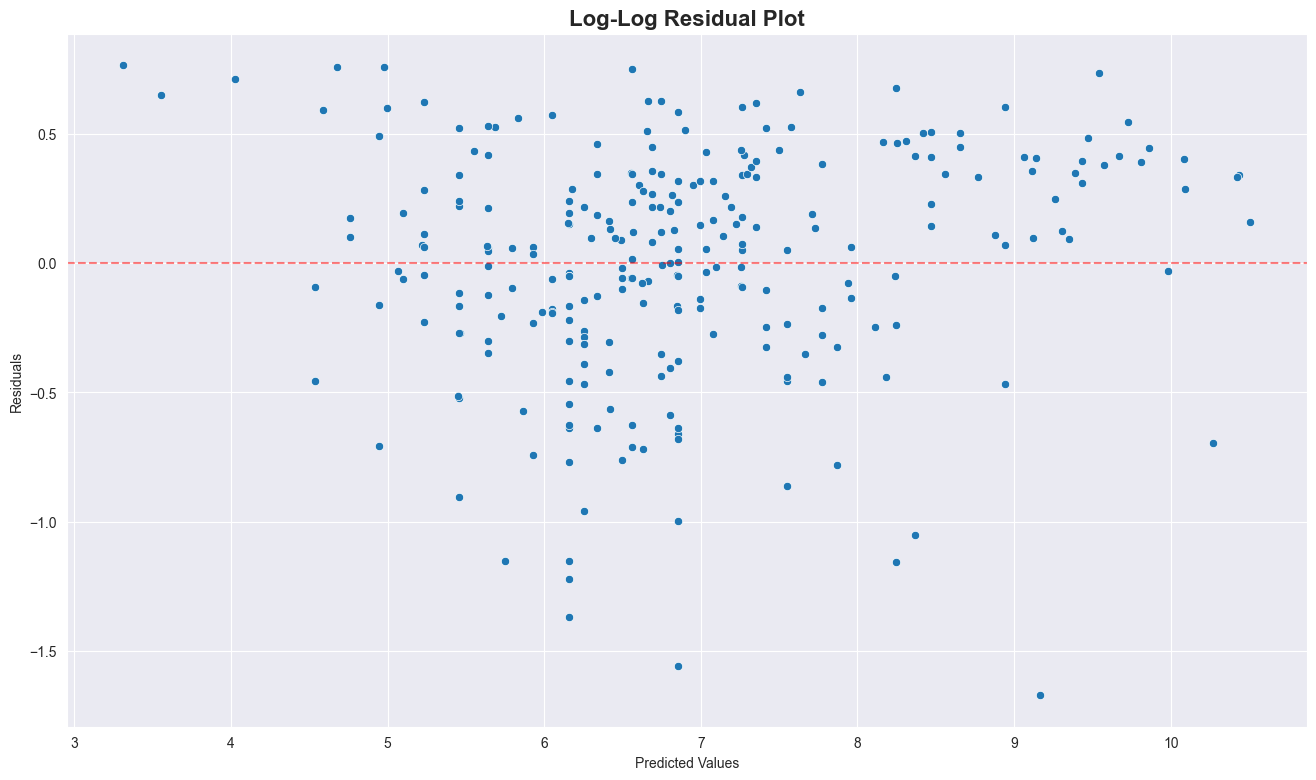

<Figure size 640x480 with 0 Axes>

In [72]:
# calculate residuals
residuals = y_test - y_pred

# create a residual plot
plt.figure(figsize=(16, 9))
sns.scatterplot(x=y_pred, 
                y=residuals)

# add in the line y = 0
plt.axhline(0, 
            color='red', 
            linestyle='--',
            alpha=0.5)

# add the title and labels
plt.title('Log-Log Residual Plot',
         fontweight='heavy',
         size=16)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.savefig('/Users/ajgafford/Documents/Projects/Python/Kaggle/Amazon/Plots/loglog_residual_plot.png',
           bbox_inches='tight',
           dpi=300)

plt.show()
plt.clf()

This is a lot better! There is a much more random scattering of residuals. $ R^2 $ is 0.9085, indicating that about 91% of the variability in $ \log $ (`discounted_price`) is explained by $ \log $ (`actual_price`). This implies that the relationship is better modeled as a **power function**:

$$ \hat{y} = 0.456 \times x^{1.005} $$

This is useful for estimating the discounted price that an item will ultimately, likely, sell for.

Now, I'd like to try one-hot encoding with some of my categorical variables!

In [73]:
# import additional packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Some of the departments are not well represented, so I will use a scheme where any department out of the major 3 from earlier will be considered 'Other'.

In [74]:
other_categories = sales['department'].value_counts()[sales['department'].value_counts() < 100].index

# Replace those categories with 'Other'
sales['department'] = sales['department'].replace(other_categories, 'Other')

In [75]:
other_categories = sales['sub_department'].value_counts()[sales['sub_department'].value_counts() < 50].index

# Replace those categories with 'Other'
sales['sub_department'] = sales['sub_department'].replace(other_categories, 'Other')

In [76]:
# isolate the categorical variables
categorical_cols = ['department', 'sub_department', 'rating_cat']

In [77]:
# set up column transformer to apply one-hot encoding to categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # drop='first' to avoid multicollinearity
    ],
    remainder='passthrough'  # keep numerical features as they are
)

In [78]:
# define the independent and dependent variables
X = sales[['log_actual_price'] + categorical_cols]
y = sales['log_discounted_price']

In [79]:
# create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # apply preprocessing (one-hot encoding)
    ('regressor', LinearRegression())  # linear regression model
])

In [80]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.16129333187590453
R² Score: 0.9219463836369518


MSE is quite low and $ R^2 $ is very close to 1, so it appears this model is behaving well. Knowing this information about a product will help make pretty accurate predictions on the discounted price that the item is sold for.

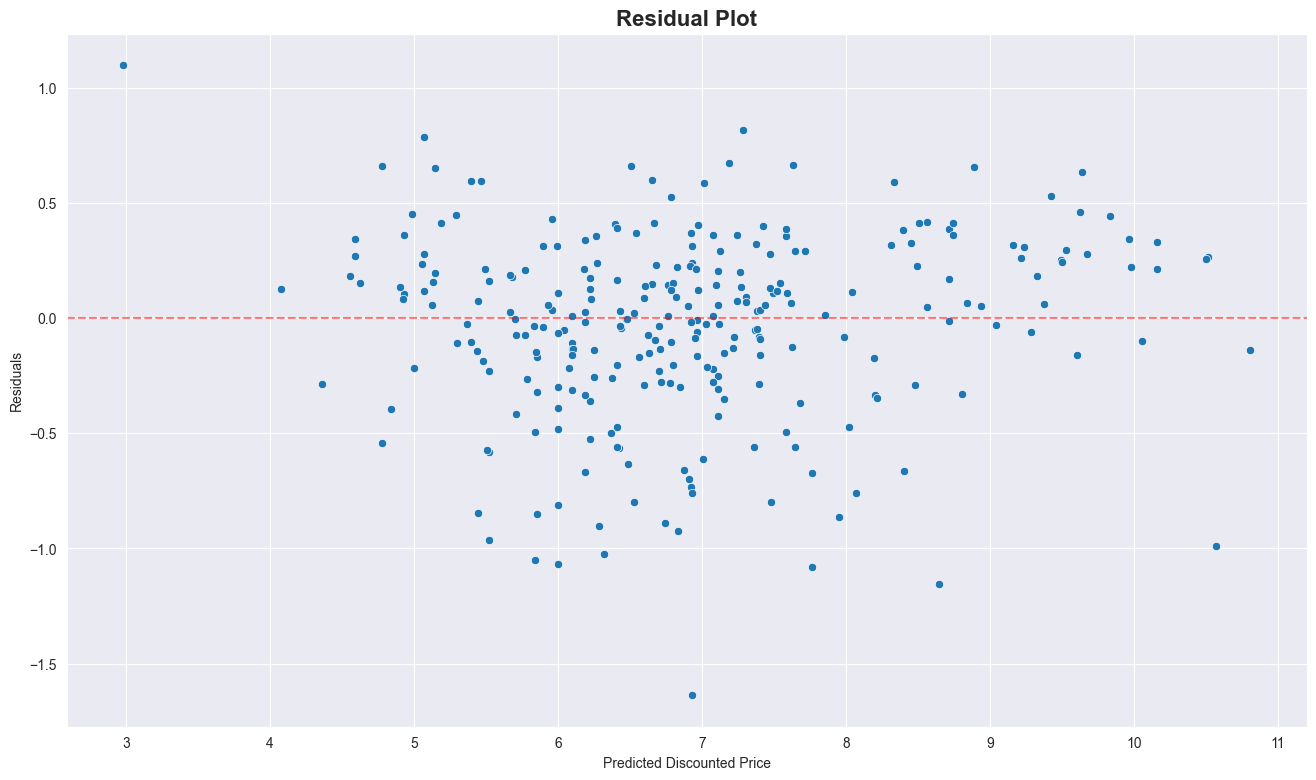

In [81]:
# Calculate residuals (actual values - predicted values)
residuals = y_test - y_pred  # Assuming y_test is your actual target values for the test set

# Create the residual plot
plt.figure(figsize=(16, 9))
sns.scatterplot(x=y_pred, 
                y=residuals)
plt.axhline(0, 
            color='red', 
            linestyle='--',
            alpha=0.5)
plt.title('Residual Plot',
         fontweight='heavy',
         size=16)
plt.xlabel('Predicted Discounted Price')
plt.ylabel('Residuals')
plt.show()
plt.clf()

## Phase 4 Summary

- Using a log-log transformation, I found that a power model was appropriate for `actual_price` predicting `discounted_price`.
- Using one-hot encoding with `department`, `sub_department`, and `rating_cat` produced a model that was quite accurate in predicting `discounted_price`.